# Project Proposal
## Project Idea
Music therapy has been shown to be a very effective means of providing therapy to patients. Many schools now have a graduate music therapy program. Throughout history there have been claims about classical music making children smarter, improving focus, and helping to calm the nerves. It would be interesting to analyze the results of this survey to see if there is any noticeable difference in results based on music genre. Particularly of interest will be classical music and its effects on survey participants. 

## Proposal
What music has the most therapeutic success. This could also be combined with the Spotify dataset to cross reference audio features, ultimately narrowing down exactly what aspects of the music are most important when it comes to music therapy. Ultimately, this data should help music therapists better select music. 

## Datasets
- [Music & Mental Health Survey](https://www.kaggle.com/datasets/catherinerasgaitis/mxmh-survey-results)
- [Spotify 1.2 Million Songs](https://www.kaggle.com/datasets/rodolfofigueroa/spotify-12m-songs)

In [1]:
import pandas as pd
import numpy as np

# Data visualization libraries

from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
survey_df = pd.read_csv('../data/raw/mxmh_survey_results.csv')

# Data Definition

In [4]:
survey_df.describe()

Age  Hours per day           BPM     Anxiety  Depression  \
count  735.000000     736.000000  6.290000e+02  736.000000  736.000000   
mean    25.206803       3.572758  1.589948e+06    5.837636    4.796196   
std     12.054970       3.028199  3.987261e+07    2.793054    3.028870   
min     10.000000       0.000000  0.000000e+00    0.000000    0.000000   
25%     18.000000       2.000000  1.000000e+02    4.000000    2.000000   
50%     21.000000       3.000000  1.200000e+02    6.000000    5.000000   
75%     28.000000       5.000000  1.440000e+02    8.000000    7.000000   
max     89.000000      24.000000  1.000000e+09   10.000000   10.000000   

         Insomnia         OCD  
count  736.000000  736.000000  
mean     3.738451    2.637228  
std      3.088689    2.842017  
min      0.000000    0.000000  
25%      1.000000    0.000000  
50%      3.000000    2.000000  
75%      6.000000    5.000000  
max     10.000000   10.000000

In [5]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

## Descriptions of Columns

- **Timestamp** - Date and time when form was submitted
- **Age** - Respondent's age
- **Primary streaming service** - Respondent's primary streaming service
- **Hours per day** - Number of hours the respondent listens to music per day
- **While working** - Does respondent listen to music while working?
- **Instrumentalist** - Does the respondent play an instrument regularly?
- **Composer** - Does the respondent compose music?
- **Fav genre** - Respondent's favorite or top genre
- **Exploratory** - Does the respondent actively explore new artists/genres?
- **Foreign languages** - Does the respondent regularly listen to music with lyrics in a language they are not fluent in?
- **BPM** - Beats per minute of favorite genre
- **Frequency (Genre)** - How frequently does the respondent listen to the Genre?
- **Anxiety** - Self reported anxiety on a scale of 1-10
- **Depression** - Self reported depression on a scale of 1-10
- **Insomnia** - Self reported insomnia on a scale of 1-10
- **OCD** - Self reported OCD on a scale of 1-10
- **Music effects** - Does music improve/worsen respondent's mental health conditions?
- **Permission** - Permissions to publicize data

# Initial Report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

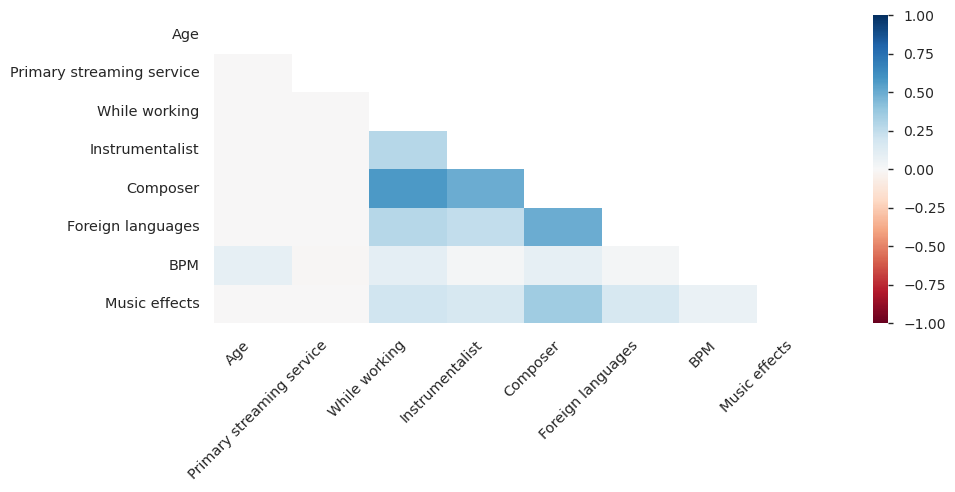

In [6]:
profile = ProfileReport(survey_df, title='Pandas Profiling Report')
profile.to_notebook_iframe()

In [7]:
survey_df.head()

Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  Very frequently            Never   
1                No  ...        Sometimes           Rarely  Very frequently   
2               Yes  ...            Never           Rarely           Rarely   
3               Yes  ...        Sometimes            Never            Never   
4                No  ...  Very frequently  Very frequently            Never   

  Frequency [Video game music] Anxiety Depression Insomnia  OCD Music effects  \
0                    Sometimes     3.0        0.0      1.0  0.0           NaN   
1                       Rarely     7.0        2.0      2.0  1.0           NaN   
2              Very frequently     7.0        7.0     10.0  2.0     No effect   
3                        Never     9.0        7.0      3.0  3.0       Improve   
4                       Rarely     7.0        2.0      5.0  9.0       Improve   

     Permissions  
0  I understand.  
1  I understand.  
2  I understand.  
3  I understand.  
4  I understand.  

[5 rows x 33 columns]

In [8]:
survey_df['Music effects'].value_counts()

Music effects
Improve      542
No effect    169
Worsen        17
Name: count, dtype: int64

## Data Definition Conclusions

### Unecessary Columns
- `Permissions` - does not provide any statistical information and can be fully dropped
- `Timestamp` - this does not provide any valuable information and will be fully dropped
- `Primary streaming service` - this information is irrelevant to our analysis and will be dropped

### Data Types
- `Age` column should be of type `int`
- `Anxiety`, `Depression`, `OCD`, `Insomnia` columns should be of type `int` since survey respondents rate these categories on a scale of 0-10

### Missing Values
The most significant amount of missing values occur in the `BPM` column, 14.5%. According to the dataset, this column represents "beats per minute of favorite genre." Since respondents filled out this survey, it's difficult to imagine them knowing what number to input for the BPM, which may explain the high quantity of missing values. This can be imputed using the Spotify dataset and using either the mean or median BPM of each genre.

Other columns with missing values:
- Age
- Primary streaming service
- While working
- Instrumentalist
- Composer
- Foreign Languages
- Music effects

### Unique Value Inconsistencies
- Anxiety, Depression, OCD, and Insomnia should have 11 unique values, since rated on a scale of 1-10. This is not the case however.
  - Some users submitted decimal values, which could either be rounded up or down.

### Correlations
- Those who frequently listen to Hip Hop also frequently listen to Rap
- Those self-scoring high in Anxiety also self-score high in Depression
- Respondents tend to listen to their favorite genre most frequently
- Hours per Day has some really high numbers, like 24, which seem hard to believe

# Data Cleaning

## Unecessary Columns

In [9]:
# Create a copy of our dataset so that we don't make changes to the raw data

clean_survey_df = survey_df.copy(deep=True)

In [10]:
# Drop Permissions and Timestamp columns

clean_survey_df = clean_survey_df.drop(['Timestamp', 'Permissions', 'Primary streaming service'], axis=1)
clean_survey_df.head()

Age  Hours per day While working Instrumentalist Composer  \
0  18.0            3.0           Yes             Yes      Yes   
1  63.0            1.5           Yes              No       No   
2  18.0            4.0            No              No       No   
3  61.0            2.5           Yes              No      Yes   
4  18.0            4.0           Yes              No       No   

          Fav genre Exploratory Foreign languages    BPM  \
0             Latin         Yes               Yes  156.0   
1              Rock         Yes                No  119.0   
2  Video game music          No               Yes  132.0   
3              Jazz         Yes               Yes   84.0   
4               R&B         Yes                No  107.0   

  Frequency [Classical]  ...  Frequency [Pop]  Frequency [R&B]  \
0                Rarely  ...  Very frequently        Sometimes   
1             Sometimes  ...        Sometimes        Sometimes   
2                 Never  ...           Rarely            Never   
3             Sometimes  ...        Sometimes        Sometimes   
4                 Never  ...        Sometimes  Very frequently   

   Frequency [Rap] Frequency [Rock] Frequency [Video game music] Anxiety  \
0  Very frequently            Never                    Sometimes     3.0   
1           Rarely  Very frequently                       Rarely     7.0   
2           Rarely           Rarely              Very frequently     7.0   
3            Never            Never                        Never     9.0   
4  Very frequently            Never                       Rarely     7.0   

  Depression Insomnia  OCD Music effects  
0        0.0      1.0  0.0           NaN  
1        2.0      2.0  1.0           NaN  
2        7.0     10.0  2.0     No effect  
3        7.0      3.0  3.0       Improve  
4        2.0      5.0  9.0       Improve  

[5 rows x 30 columns]

## Datatypes

### Age

In [11]:
clean_survey_df['Age'].dtypes

dtype('float64')

In [12]:
# Need to fill missing values before changing dtype
# Confirming there is one column with no value for Age

clean_survey_df[clean_survey_df['Age'].isna()]

Age  Hours per day While working Instrumentalist Composer Fav genre  \
12  NaN            3.0           Yes              No       No   Hip hop   

   Exploratory Foreign languages  BPM Frequency [Classical]  ...  \
12         Yes               Yes  NaN                Rarely  ...   

   Frequency [Pop] Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
12       Sometimes       Sometimes          Rarely           Rarely   

   Frequency [Video game music] Anxiety Depression Insomnia  OCD Music effects  
12                        Never     9.0        3.0      2.0  7.0       Improve  

[1 rows x 30 columns]

/home/arsen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


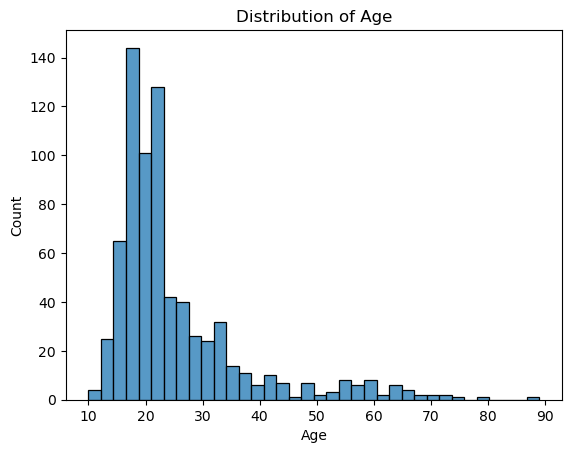

In [13]:
# Checking distribution of ages to determine whether to use mean or median to impute the value

g = sns.histplot(x='Age', data=clean_survey_df)
g.set_title(label='Distribution of Age')

plt.show()

In [14]:
# Impute the missing age using the median age since it's right-skewed

clean_survey_df['Age'] = clean_survey_df['Age'].fillna(clean_survey_df['Age'].median())

# Confirm there are no more missing values in Age

clean_survey_df['Age'].isna().sum()

0

In [15]:
# Change dtype of Age column from float to int

clean_survey_df['Age'] = clean_survey_df['Age'].astype('int')

# Confirm Age is now an int

clean_survey_df['Age'].dtypes

dtype('int64')

### While working, Instrumentalist, Composer, Exploratory, and Foreign languages

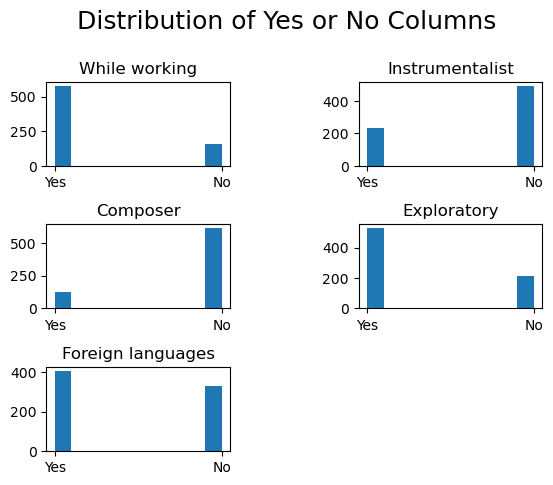

In [16]:
# Chart distributions of these columns to figure out what values to impute missing values with

column_names = ['While working', 'Instrumentalist', 'Composer', 'Exploratory', 'Foreign languages']

plt.suptitle('Distribution of Yes or No Columns', fontsize=18, y=1.03)
plt.subplots_adjust(hspace=0.7, wspace=0.7)

for i, column in enumerate(column_names):
    ax = plt.subplot(3, 2, i+1)
    clean_survey_df[column].hist(ax=ax)

    ax.set_title(column)
    ax.set_xlabel('')
    ax.grid(False)

plt.show()

In [17]:
# Impute missing values using the mode

for column in column_names:
    clean_survey_df[column] = clean_survey_df[column].fillna(clean_survey_df[column].mode().iloc[0])

# Confirm no more missing values

clean_survey_df[column_names].isna().sum()

While working        0
Instrumentalist      0
Composer             0
Exploratory          0
Foreign languages    0
dtype: int64

### Anxiety, Depression, OCD, and Insomnia

In [18]:
# Check data ranges, should be 11 since using scale of 0-10

columns = ['Anxiety', 'Depression', 'OCD', 'Insomnia']
clean_survey_df[columns].nunique()

Anxiety       12
Depression    12
OCD           13
Insomnia      12
dtype: int64

In [19]:
# Convert to 'int' so decimal values are rounded and confirm data type

clean_survey_df[columns] = clean_survey_df[columns].astype('int')

clean_survey_df[columns].dtypes

Anxiety       int64
Depression    int64
OCD           int64
Insomnia      int64
dtype: object

In [20]:
# Confirm data range

clean_survey_df[columns].nunique()

Anxiety       11
Depression    11
OCD           11
Insomnia      11
dtype: int64

### Music effects

In [21]:
# Investigate missing data

clean_survey_df['Music effects'].isna().sum()

8

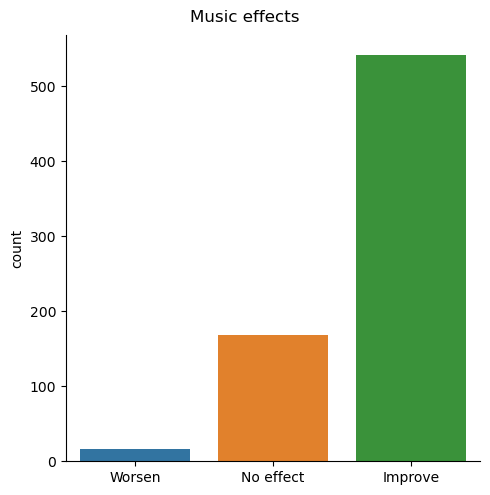

In [22]:
category_order = ['Worsen', 'No effect', 'Improve']

g = sns.catplot(x='Music effects', data=clean_survey_df, kind='count', order=category_order)
g.fig.suptitle('Music effects', y=1.02)
g.set(xlabel='')

plt.show()

In [23]:
# Since Music effects contains the most relevant data, we will just drop rows missing this value and confirm no missing values

clean_survey_df = clean_survey_df.dropna(subset=['Music effects'])

clean_survey_df['Music effects'].isna().sum()

0

## BPM Column

In order to impute the missing values in the BPM column, we will pull audio features of songs of each listed genre in the 'Fav genre' column. This data will then be investigated, and a method of deriving an imputation value will be determined. Possibilities include the average BPM of songs of each genre, the median BPM, or the mode.

In [24]:
# Number of missing values in BPM

clean_survey_df['BPM'].isna().sum()

104

In [25]:
# List of all favorite genres

genre_list = clean_survey_df['Fav genre'].unique()
genre_list

array(['Video game music', 'Jazz', 'R&B', 'K pop', 'Rock', 'Country',
       'EDM', 'Hip hop', 'Pop', 'Rap', 'Classical', 'Metal', 'Folk',
       'Lofi', 'Gospel', 'Latin'], dtype=object)

### Generate Spotify Data

In [26]:
import sys
sys.path.append('../music_therapy_capstone')

from spotify_machine import SpotifyMachine

In [27]:
spotify_machine = SpotifyMachine()
type(spotify_machine)

spotify_machine.SpotifyMachine

### Country Music

In [28]:
datapath = '../data/raw/'

In [29]:
country_df = pd.read_csv(datapath + 'Country.csv')
country_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.429   0.453    0    -7.746     1       0.0459      0.554000   
1         0.712   0.603    8    -5.520     1       0.0262      0.186000   
2         0.461   0.887   11    -4.871     0       0.0429      0.000219   
3         0.492   0.673    6    -5.431     1       0.0347      0.413000   
4         0.529   0.866    3    -5.816     0       0.0452      0.002810   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000002    0.1020    0.155   77.639  audio_features   
1          0.000000    0.1150    0.670   97.994  audio_features   
2          0.000000    0.1040    0.411   95.964  audio_features   
3          0.000000    0.1370    0.488  203.812  audio_features   
4          0.005260    0.0287    0.550  116.004  audio_features   

                       id                                   uri  \
0  4KULAymBBJcPRpk1yO4dOG  spotify:track:4KULAymBBJcPRpk1yO4dOG   
1  1Lo0QY9cvc8sUB2vnIOxDT  spotify:track:1Lo0QY9cvc8sUB2vnIOxDT   
2  5ya0TmUQw2wHMkq36rPsnd  spotify:track:5ya0TmUQw2wHMkq36rPsnd   
3  59uQI0PADDKeE6UZDTJEe8  spotify:track:59uQI0PADDKeE6UZDTJEe8   
4  2eGvz6O6tVnh9nKiitDEhZ  spotify:track:2eGvz6O6tVnh9nKiitDEhZ   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/4KULAymBBJcP...   
1  https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...   
2  https://api.spotify.com/v1/tracks/5ya0TmUQw2wH...   
3  https://api.spotify.com/v1/tracks/59uQI0PADDKe...   
4  https://api.spotify.com/v1/tracks/2eGvz6O6tVnh...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/4KUL...       227196   
1  https://api.spotify.com/v1/audio-analysis/1Lo0...       265493   
2  https://api.spotify.com/v1/audio-analysis/5ya0...       189987   
3  https://api.spotify.com/v1/audio-analysis/59uQ...       163855   
4  https://api.spotify.com/v1/audio-analysis/2eGv...       163600   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

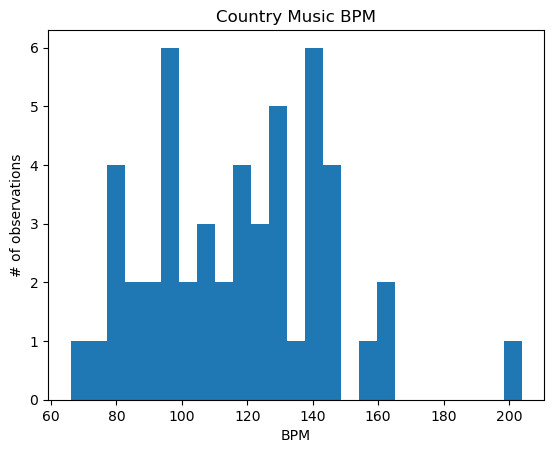

In [30]:
# Visualize distribution of tempo

fig, ax = plt.subplots()
ax.hist(country_df['tempo'], bins=25)
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
ax.set_title('Country Music BPM')

plt.show()

In [31]:
# Convert BPM to int in order to round them

country_df['tempo'] = country_df['tempo'].astype('int')
country_df['tempo'].dtypes

dtype('int64')

In [32]:
# Check to see if any values repeat

country_df['tempo'].value_counts().nlargest(3)

tempo
97     3
139    3
116    2
Name: count, dtype: int64

After rounding the values, it appears that 97 and 139 are the most frequent tempi. However, according to the histogram representation, there seem to be more country songs in the ballpark of 139 bpm than 97 bpm. Therefore, we will use 139 to impute the values.

In [33]:
# Set BPM of rows with Fav genre == Country and BPM missing to 139

country_index = clean_survey_df[(clean_survey_df['Fav genre'] == 'Country') & (clean_survey_df['BPM'].isna())].index
clean_survey_df.loc[country_index, 'BPM'] = 139

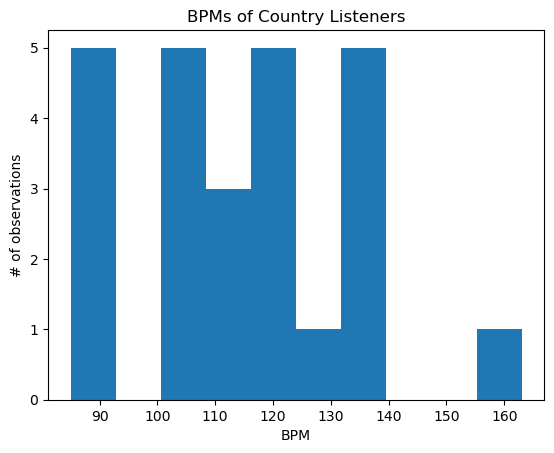

In [34]:
# Investigate BPM of country rows to confirm result

fig, ax = plt.subplots()
ax.hist(clean_survey_df[clean_survey_df['Fav genre'] == 'Country']['BPM'])

ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
ax.set_title('BPMs of Country Listeners')

plt.show()

### Rock Music

In [35]:
clean_survey_df[clean_survey_df['Fav genre'] == 'Rock']['BPM'].isna().sum()

36

In [36]:
# Load Rock data from Spotify

rock_df = pd.read_csv(datapath + 'Rock.csv')
rock_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.315   0.715   11    -8.072     0       0.0362      0.001250   
1         0.505   0.754    4    -7.435     1       0.0366      0.132000   
2         0.741   0.697    0    -7.028     1       0.0277      0.066400   
3         0.417   0.934    7    -3.908     0       0.1190      0.000278   
4         0.464   0.795    1    -9.267     1       0.0926      0.049300   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000008    0.0942    0.497  155.925  audio_features   
1          0.000000    0.2040    0.510  119.204  audio_features   
2          0.000023    0.1330    0.774  116.109  audio_features   
3          0.001500    0.1320    0.287  127.066  audio_features   
4          0.002440    0.3990    0.612  158.691  audio_features   

                       id                                   uri  \
0  6Qyc6fS4DsZjB2mRW9DsQs  spotify:track:6Qyc6fS4DsZjB2mRW9DsQs   
1  5RKQ5NdjSh2QzD4MaunT91  spotify:track:5RKQ5NdjSh2QzD4MaunT91   
2  2LawezPeJhN4AWuSB0GtAU  spotify:track:2LawezPeJhN4AWuSB0GtAU   
3  2DlHlPMa4M17kufBvI2lEN  spotify:track:2DlHlPMa4M17kufBvI2lEN   
4  63T7DJ1AFDD6Bn8VzG6JE8  spotify:track:63T7DJ1AFDD6Bn8VzG6JE8   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/6Qyc6fS4DsZj...   
1  https://api.spotify.com/v1/tracks/5RKQ5NdjSh2Q...   
2  https://api.spotify.com/v1/tracks/2LawezPeJhN4...   
3  https://api.spotify.com/v1/tracks/2DlHlPMa4M17...   
4  https://api.spotify.com/v1/tracks/63T7DJ1AFDD6...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/6Qyc...       289533   
1  https://api.spotify.com/v1/audio-analysis/5RKQ...       249600   
2  https://api.spotify.com/v1/audio-analysis/2Law...       160133   
3  https://api.spotify.com/v1/audio-analysis/2DlH...       210240   
4  https://api.spotify.com/v1/audio-analysis/63T7...       202267   

   time_signature  
0               3  
1               4  
2               4  
3               4  
4               4

In [37]:
# Convert tempo to int in order to round the values

rock_df['tempo'] = rock_df['tempo'].astype('int')
rock_df['tempo'].dtypes

dtype('int64')

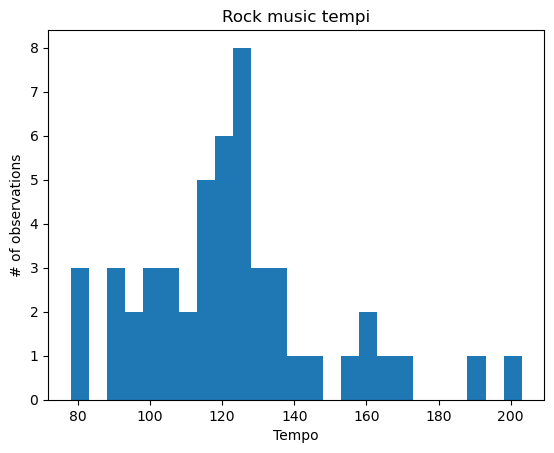

In [38]:
# Visual distribution of tempi in Rock

fig, ax = plt.subplots()
ax.hist(rock_df['tempo'], bins=25)
ax.set_xlabel('Tempo')
ax.set_ylabel('# of observations')
ax.set_title('Rock music tempi')

plt.show()

In [39]:
rock_df['tempo'].value_counts().nlargest(3)

tempo
116    3
122    3
127    2
Name: count, dtype: int64

116 and 122 are the most frequent tempi. Since they are also so close to each other, it's unlikely that a difference of 6 BPM would create a clinical difference. Since there seem to be more tempi around 122, we will impute the missing values with that.

In [40]:
# Impute missing BPM values for participants with rock as their favorite genre

rock_index = clean_survey_df[(clean_survey_df['Fav genre'] == 'Rock') & (clean_survey_df['BPM'].isna())].index
clean_survey_df.loc[rock_index, 'BPM'] = 122

In [41]:
# Confirm no missing values left

clean_survey_df[clean_survey_df['Fav genre'] == 'Rock']['BPM'].isna().sum()

0

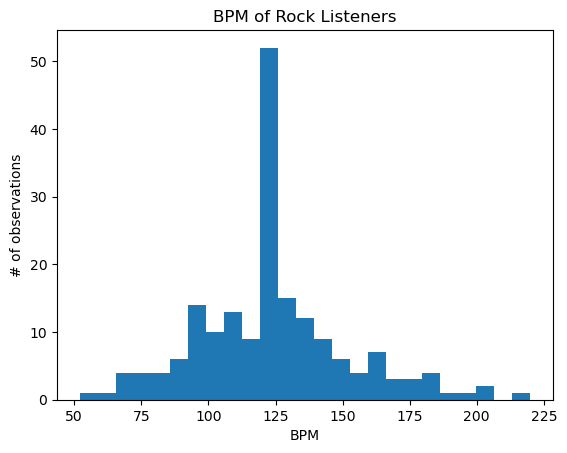

In [42]:
# Investigate BPM of rock rows to confirm results

fig, ax = plt.subplots()
ax.hist(clean_survey_df[clean_survey_df['Fav genre'] == 'Rock']['BPM'], bins=25)
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
ax.set_title('BPM of Rock Listeners')

plt.show()

### Jazz Music

In [43]:
# Load Jazz data

jazz_df = pd.read_csv(datapath + 'Jazz.csv')
jazz_df.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.349  0.1820    5   -13.507     1       0.0310         0.920   
1         0.454  0.2600    8   -13.193     0       0.0401         0.539   
2         0.355  0.0304    1   -20.479     1       0.0361         0.989   
3         0.262  0.3560    0    -8.031     0       0.0303         0.613   
4         0.532  0.0657    0   -19.136     0       0.0406         0.940   

   instrumentalness  liveness  valence    tempo            type  \
0           0.01520    0.1430    0.178  136.094  audio_features   
1           0.00078    0.0675    0.598  174.322  audio_features   
2           0.05550    0.1160    0.188   90.495  audio_features   
3           0.00000    0.1750    0.426  174.177  audio_features   
4           0.00488    0.0946    0.292  128.607  audio_features   

                       id                                   uri  \
0  648TTtYB0bH0P8Hfy0FmkL  spotify:track:648TTtYB0bH0P8Hfy0FmkL   
1  1YQWosTIljIvxAgHWTp7KP  spotify:track:1YQWosTIljIvxAgHWTp7KP   
2  4smkJW6uzoHxGReZqqwHS5  spotify:track:4smkJW6uzoHxGReZqqwHS5   
3  2IdwQxhJn9ZE4zIotcCefR  spotify:track:2IdwQxhJn9ZE4zIotcCefR   
4  0F845nujLVqCb0XMZCh5Pc  spotify:track:0F845nujLVqCb0XMZCh5Pc   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/648TTtYB0bH0...   
1  https://api.spotify.com/v1/tracks/1YQWosTIljIv...   
2  https://api.spotify.com/v1/tracks/4smkJW6uzoHx...   
3  https://api.spotify.com/v1/tracks/2IdwQxhJn9ZE...   
4  https://api.spotify.com/v1/tracks/0F845nujLVqC...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/648T...       191973   
1  https://api.spotify.com/v1/audio-analysis/1YQW...       324133   
2  https://api.spotify.com/v1/audio-analysis/4smk...       211533   
3  https://api.spotify.com/v1/audio-analysis/2Idw...       187667   
4  https://api.spotify.com/v1/audio-analysis/0F84...       201440   

   time_signature  
0               3  
1               5  
2               3  
3               3  
4               4

In [44]:
# Convert tempo to integers so we can have whole BPM values and confirm conversion

jazz_df['tempo'] = jazz_df['tempo'].astype(int)
jazz_df['tempo'].dtypes

dtype('int64')

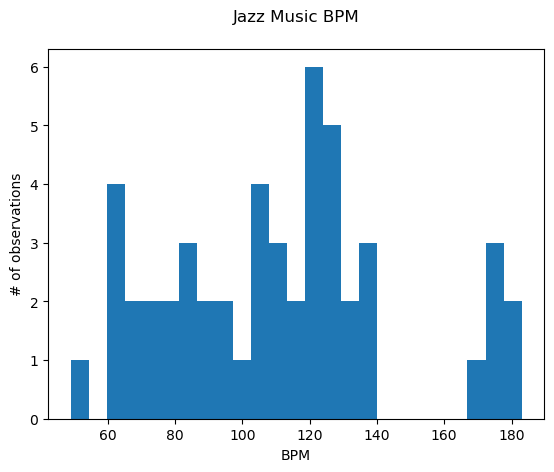

In [45]:
# Visualize distribution of tempo

fig, ax = plt.subplots()
ax.hist(jazz_df['tempo'], bins=25)
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')

plt.title('Jazz Music BPM', pad=20)

plt.show()

We'll go ahead and use the median to impute the value of BPM for jazz music. This is because the mean seems to be skewed by outliers, and there isn't a significant enough difference between counts to use the mode.

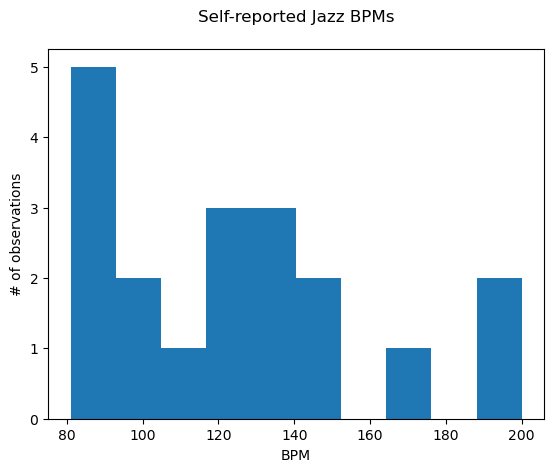

In [46]:
# Visualize distribution of self-reported BPMs of Jazz lovers

survey_jazz = clean_survey_df[clean_survey_df['Fav genre'] == 'Jazz']

plt.hist(survey_jazz['BPM'])

plt.xlabel('BPM')
plt.ylabel('# of observations')
plt.title('Self-reported Jazz BPMs', pad=20)

plt.show()

Since these BPMs are not terribly far off from the ones we pulled from Spotify, we won't alter them.

In [47]:
# Check for missing bpm values

survey_jazz['BPM'].isna().sum()

1

In [48]:
# Impute missing value with median of spotify data

jazz_index = survey_jazz.index
clean_survey_df.loc[jazz_index, 'BPM'] = survey_jazz['BPM'].fillna(np.median(jazz_df['tempo']))

# Verify there are no more missing values

clean_survey_df[clean_survey_df['Fav genre'] == 'Jazz']['BPM'].isna().sum()

0

### Video Game Music

In [49]:
# Generate video game music dataset from Spotify

# spotify_machine.gen_genre_df('Video game music')

In [50]:
# Load video game data

vg_spotify = pd.read_csv(datapath + 'Video game music.csv')
vg_spotify.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.381   0.546    4   -12.010     0       0.0521         0.160   
1         0.250   0.229    2   -15.153     0       0.0351         0.881   
2         0.463   0.523    2   -12.313     0       0.0421         0.276   
3         0.375   0.344    2   -12.561     0       0.0335         0.810   
4         0.587   0.467    4   -12.392     0       0.0306         0.867   

   instrumentalness  liveness  valence    tempo            type  \
0             0.739    0.1060    0.210  124.827  audio_features   
1             0.927    0.1190    0.163  169.858  audio_features   
2             0.934    0.3250    0.126  116.959  audio_features   
3             0.776    0.0682    0.106  126.060  audio_features   
4             0.928    0.0980    0.353  154.636  audio_features   

                       id                                   uri  \
0  1MfTuagMwz6HvPPR5q4aEh  spotify:track:1MfTuagMwz6HvPPR5q4aEh   
1  7aENwq13lwx4TLLNRDxr5P  spotify:track:7aENwq13lwx4TLLNRDxr5P   
2  0OMcEHVp7uAu64jihWEpX3  spotify:track:0OMcEHVp7uAu64jihWEpX3   
3  05UMQXFCsa9oPnLgfJHVyF  spotify:track:05UMQXFCsa9oPnLgfJHVyF   
4  285ieonEuLkll3zknYK2TY  spotify:track:285ieonEuLkll3zknYK2TY   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/1MfTuagMwz6H...   
1  https://api.spotify.com/v1/tracks/7aENwq13lwx4...   
2  https://api.spotify.com/v1/tracks/0OMcEHVp7uAu...   
3  https://api.spotify.com/v1/tracks/05UMQXFCsa9o...   
4  https://api.spotify.com/v1/tracks/285ieonEuLkl...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/1MfT...       107720   
1  https://api.spotify.com/v1/audio-analysis/7aEN...       112762   
2  https://api.spotify.com/v1/audio-analysis/0OMc...       285880   
3  https://api.spotify.com/v1/audio-analysis/05UM...       237900   
4  https://api.spotify.com/v1/audio-analysis/285i...       183533   

   time_signature  
0               4  
1               3  
2               1  
3               4  
4               3

In [51]:
# Convert tempo to integers

vg_spotify['tempo'] = vg_spotify['tempo'].astype(int)
vg_spotify['tempo'].dtypes

dtype('int64')

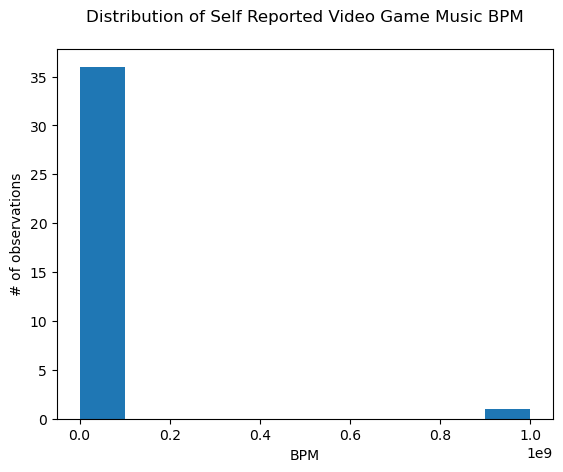

In [52]:
# Investigate survey data

vg_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Video game music']

plt.hist(vg_survey['BPM'])
plt.xlabel('BPM')
plt.ylabel('# of observations')
plt.title('Distribution of Self Reported Video Game Music BPM', pad=20)

plt.show()

There appears to be a very clear outlier, with an impossibly high reported BPM. 

In [53]:
# Zoom in on outlier BPM

outlier = vg_survey.query("BPM > 220")['BPM']
outlier

568    999999999.0
Name: BPM, dtype: float64

We'll go ahead and drop this row from the data.

In [54]:
# Drop row

outlier_index = outlier.index
clean_survey_df = clean_survey_df.drop(outlier_index)

Now we can visualize the distribution of BPM in the survey data and spotify data, and compare the two to pick the best option to impute missing values.

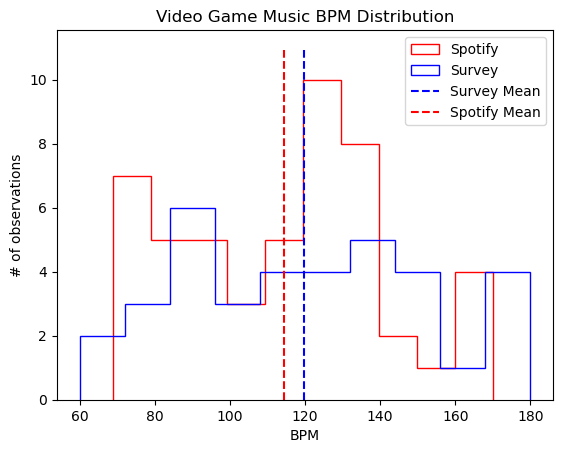

In [55]:
# Visualize Spotify and survey data

vg_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Video game music']

fig, ax = plt.subplots()
ax.hist(vg_spotify['tempo'], color='Red', histtype='step')
ax.hist(vg_survey['BPM'], color='Blue', histtype='step')
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
ax.set_title('Video Game Music BPM Distribution')

# Add vertical lines denoting the mean of each dataset

survey_mean = np.mean(vg_survey['BPM'])
spotify_mean = np.mean(vg_spotify['tempo'])

ax.vlines(x=survey_mean, ymin=0, ymax=11, color='Blue', linestyles='--')
ax.vlines(x=spotify_mean, ymin=0, ymax=11, color='Red', linestyles='--')

plt.legend(['Spotify', 'Survey', 'Survey Mean', 'Spotify Mean'])

plt.show()

Although the distributions look relatively similar, the Spotify one has alot more songs with BPMs in the 120-140 range. This is apparent also from its higher mean value. We'll go ahead and use the mean of the spotify data to impute the missing values in the survey.

In [56]:
# Fill in missing Video Game Music BPM values with mean of Spotify data

vg_index = vg_survey.index
clean_survey_df.loc[vg_index, 'BPM'] = vg_survey['BPM'].fillna(spotify_mean)
clean_survey_df.loc[vg_index, 'BPM'].isna().sum()

0

### R&B

In [57]:
# Generate R&B dataset from Spotify

# spotify_machine.gen_genre_df('R&B')

In [58]:
# Load R&B data

rnb_spotify = pd.read_csv(datapath + 'R&B.csv')
rnb_spotify.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.559   0.551    5    -7.231     1       0.1320         0.141   
1         0.645   0.634   10    -3.769     0       0.0341         0.158   
2         0.545   0.545    9    -7.362     1       0.1070         0.667   
3         0.665   0.695    0    -5.763     1       0.0532         0.347   
4         0.725   0.487    8    -5.959     0       0.0368         0.260   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000000    0.1100    0.392  143.008  audio_features   
1          0.000004    0.0908    0.352  160.017  audio_features   
2          0.000055    0.4170    0.549  159.940  audio_features   
3          0.000000    0.1060    0.707   90.119  audio_features   
4          0.000011    0.4310    0.599  136.086  audio_features   

                       id                                   uri  \
0  4iZ4pt7kvcaH6Yo8UoZ4s2  spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2   
1  2hrycoFU1mZw6YPvMcn8yC  spotify:track:2hrycoFU1mZw6YPvMcn8yC   
2  3xKsf9qdS1CyvXSMEid6g8  spotify:track:3xKsf9qdS1CyvXSMEid6g8   
3  6zMUIb4uce1CzpbjR3vMdN  spotify:track:6zMUIb4uce1CzpbjR3vMdN   
4  1m2xMsxbtxv21Brome189p  spotify:track:1m2xMsxbtxv21Brome189p   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/4iZ4pt7kvcaH...   
1  https://api.spotify.com/v1/tracks/2hrycoFU1mZw...   
2  https://api.spotify.com/v1/tracks/3xKsf9qdS1Cy...   
3  https://api.spotify.com/v1/tracks/6zMUIb4uce1C...   
4  https://api.spotify.com/v1/tracks/1m2xMsxbtxv2...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/4iZ4...       201800   
1  https://api.spotify.com/v1/audio-analysis/2hry...       122361   
2  https://api.spotify.com/v1/audio-analysis/3xKs...       184516   
3  https://api.spotify.com/v1/audio-analysis/6zMU...       227387   
4  https://api.spotify.com/v1/audio-analysis/1m2x...       296693   

   time_signature  
0               4  
1               4  
2               3  
3               4  
4               4

In [59]:
# Convert tempo to int

rnb_spotify['tempo'] = rnb_spotify['tempo'].astype(int)
rnb_spotify['tempo'].dtypes

dtype('int64')

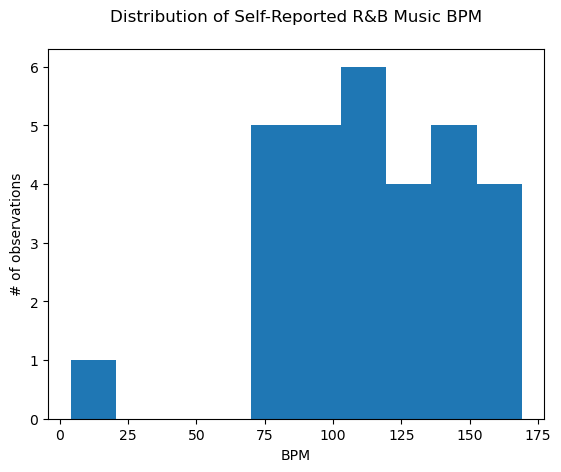

In [60]:
# Investigate survey data

rnb_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'R&B']

plt.hist(rnb_survey['BPM'])
plt.xlabel('BPM')
plt.ylabel('# of observations')
plt.title('Distribution of Self-Reported R&B Music BPM', pad=20)

plt.show()

There does appear to one very low BPM value, which is also incredibly unlikely. Let's investigate that row

In [61]:
outlier = rnb_survey.query("BPM < 25")
outlier

Age  Hours per day While working Instrumentalist Composer Fav genre  \
429   73            3.0           Yes              No       No       R&B   

    Exploratory Foreign languages  BPM Frequency [Classical]  ...  \
429         Yes               Yes  4.0             Sometimes  ...   

    Frequency [Pop]  Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
429       Sometimes  Very frequently       Sometimes        Sometimes   

    Frequency [Video game music] Anxiety Depression Insomnia OCD Music effects  
429                        Never       5          4        0   1       Improve  

[1 rows x 30 columns]

We'll go ahead and drop this row from the data and visually confirm its removal.

In [62]:
outlier_index = outlier.index

clean_survey_df = clean_survey_df.drop(outlier_index)

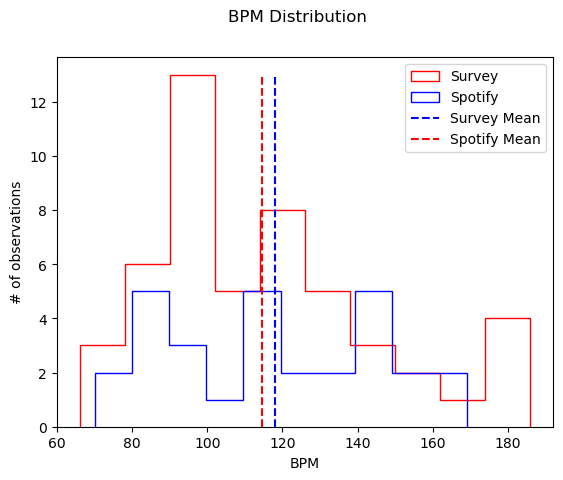

In [63]:
# Visualize survey data following removal of outlier along with Spotify data.

rnb_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'R&B']

fig, ax = plt.subplots()

ax.hist(rnb_spotify['tempo'], color='Red', histtype='step')
ax.hist(rnb_survey['BPM'], color='Blue', histtype='step')
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')

fig.suptitle('BPM Distribution')

# Plot vertical lines to denote respective means
spotify_mean = np.mean(rnb_spotify['tempo'])
survey_mean = np.mean(rnb_survey['BPM'])

ax.vlines(x=survey_mean, ymin=0, ymax=13, color='Blue', linestyles='--')
ax.vlines(x=spotify_mean, ymin=0, ymax=13, color='Red', linestyles='--')

plt.legend(['Survey', 'Spotify', 'Survey Mean', 'Spotify Mean'])

plt.show()

Since the Spotify data is so heavily right skewed, we'll consider using the mean or mode to impute values in the Survey data.

In [64]:
# Median of Spotify tempo

np.median(rnb_spotify['tempo'])

111.0

In [65]:
rnb_spotify['tempo'].value_counts().nlargest(3)

tempo
94     4
90     3
100    2
Name: count, dtype: int64

We'll go ahead and use the mode, which is 4, to impute the missing values in our survey data.

In [66]:
# Impute missing values using the mode, 94

rnb_index = rnb_survey.index
clean_survey_df.loc[rnb_index, 'BPM'] = rnb_survey['BPM'].fillna(94)
clean_survey_df.loc[rnb_index, 'BPM'].isna().sum()

0

### K Pop

In [67]:
# Generate K-pop data set

# spotify_machine.gen_genre_df('K pop')

In [68]:
# Load K pop data set

kpop_spotify = pd.read_csv(datapath + 'K pop.csv')
kpop_spotify.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.799   0.675    1    -5.474     1       0.0465       0.11500   
1         0.477   0.854    7    -4.715     1       0.2750       0.08580   
2         0.739   0.904    5    -2.655     0       0.0442       0.54900   
3         0.758   0.858    5    -2.502     1       0.0464       0.43000   
4         0.714   0.812    7    -2.703     1       0.0351       0.00189   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000000    0.0833    0.594  113.076  audio_features   
1          0.000000    0.0650    0.314  140.515  audio_features   
2          0.000010    0.0948    0.788  167.033  audio_features   
3          0.000000    0.2010    0.963  119.992  audio_features   
4          0.000002    0.2290    0.377  112.018  audio_features   

                       id                                   uri  \
0  3lwK3WyKAI5bUuGY1OgGbZ  spotify:track:3lwK3WyKAI5bUuGY1OgGbZ   
1  7ov3TDp5D00Rnu5R1viX4w  spotify:track:7ov3TDp5D00Rnu5R1viX4w   
2  6aJn7Cst74cj4lNIiPRgav  spotify:track:6aJn7Cst74cj4lNIiPRgav   
3  6Yj8kVuVR3UPxx9r5eFEoV  spotify:track:6Yj8kVuVR3UPxx9r5eFEoV   
4  6BKOhvRPY54uvfqWwg7MKi  spotify:track:6BKOhvRPY54uvfqWwg7MKi   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/3lwK3WyKAI5b...   
1  https://api.spotify.com/v1/tracks/7ov3TDp5D00R...   
2  https://api.spotify.com/v1/tracks/6aJn7Cst74cj...   
3  https://api.spotify.com/v1/tracks/6Yj8kVuVR3UP...   
4  https://api.spotify.com/v1/tracks/6BKOhvRPY54u...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/3lwK...       166384   
1  https://api.spotify.com/v1/audio-analysis/7ov3...       179790   
2  https://api.spotify.com/v1/audio-analysis/6aJn...       129883   
3  https://api.spotify.com/v1/audio-analysis/6Yj8...       179808   
4  https://api.spotify.com/v1/audio-analysis/6BKO...       189882   

   time_signature  
0               4  
1               5  
2               4  
3               4  
4               4

In [69]:
# Convert tempo to int

kpop_spotify['tempo'] = kpop_spotify['tempo'].astype(int)
kpop_spotify['tempo'].dtypes

dtype('int64')

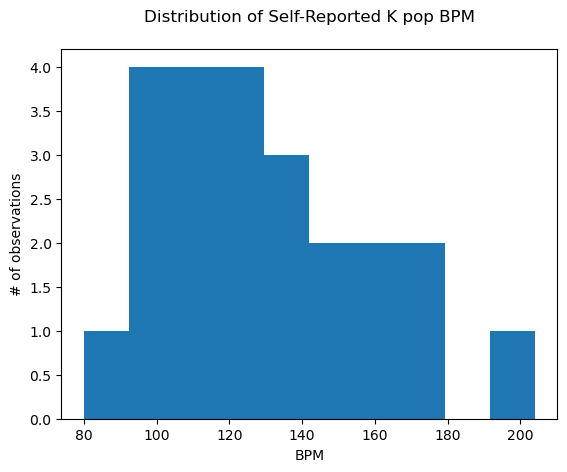

In [70]:
# Visualize survey data

kpop_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'K pop']

plt.hist(kpop_survey['BPM'])
plt.xlabel('BPM')
plt.ylabel('# of observations')
plt.title('Distribution of Self-Reported K pop BPM', pad=20)

plt.show()

Since there aren't any extreme outliers we need to take care of, we'll go ahead and compare this with the data collected from Spotify.

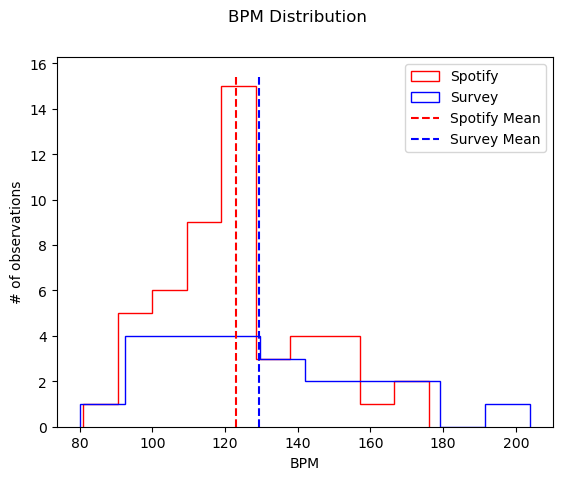

In [71]:
# Plot Spotify and Survey BPM Distributions

fig, ax = plt.subplots()

ax.hist(kpop_spotify['tempo'], histtype='step', color='Red')
ax.hist(kpop_survey['BPM'], histtype='step', color='Blue')
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')

fig.suptitle('BPM Distribution')

# Plot vertical lines to denote respective means
spotify_mean = np.mean(kpop_spotify['tempo'])
survey_mean = np.mean(kpop_survey['BPM'])

ax.vlines(x=spotify_mean, ymin=0, ymax=15.5, color='Red', linestyles='--')
ax.vlines(x=survey_mean, ymin=0, ymax=15.5, color='Blue', linestyles='--')

ax.legend(['Spotify', 'Survey', 'Spotify Mean', 'Survey Mean'])

plt.show()

We'll go ahead and impute the missing values in the survey data with the mean of the Spotify data.

In [72]:
clean_survey_df.loc[kpop_survey.index, 'BPM'] = kpop_survey['BPM'].fillna(spotify_mean)
clean_survey_df.loc[kpop_survey.index, 'BPM'].isna().sum()

0

### EDM

In [73]:
# Load EDM data from Spotify

# spotify_machine.gen_genre_df('EDM')

In [74]:
# Load data

edm_spotify = pd.read_csv(datapath + 'EDM.csv')
edm_spotify.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.673   0.950   11    -5.149     1       0.0488        0.0229   
1         0.875   0.518    2    -8.388     1       0.0551        0.0638   
2         0.681   0.714    1    -4.617     0       0.0309        0.0375   
3         0.580   0.777    3    -5.690     1       0.0655        0.1040   
4         0.696   0.793    8    -5.733     1       0.0970        0.0683   

   instrumentalness  liveness  valence    tempo            type  \
0          0.082300     0.398    0.563  150.019  audio_features   
1          0.009950     0.125    0.370  126.089  audio_features   
2          0.000000     0.232    0.554  129.976  audio_features   
3          0.000000     0.342    0.589  108.005  audio_features   
4          0.000004     0.180    0.698  120.003  audio_features   

                       id                                   uri  \
0  09CnYHiZ5jGT1wr1TXJ9Zt  spotify:track:09CnYHiZ5jGT1wr1TXJ9Zt   
1  0h3Xy4V4apMraB5NuM8U7Z  spotify:track:0h3Xy4V4apMraB5NuM8U7Z   
2  331l3xABO0HMr1Kkyh2LZq  spotify:track:331l3xABO0HMr1Kkyh2LZq   
3  0LMwmV37RCmBO2so0szAFs  spotify:track:0LMwmV37RCmBO2so0szAFs   
4  6BePGk3eCan4FqaW2X8Qy3  spotify:track:6BePGk3eCan4FqaW2X8Qy3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/09CnYHiZ5jGT...   
1  https://api.spotify.com/v1/tracks/0h3Xy4V4apMr...   
2  https://api.spotify.com/v1/tracks/331l3xABO0HM...   
3  https://api.spotify.com/v1/tracks/0LMwmV37RCmB...   
4  https://api.spotify.com/v1/tracks/6BePGk3eCan4...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/09Cn...       140000   
1  https://api.spotify.com/v1/audio-analysis/0h3X...       213364   
2  https://api.spotify.com/v1/audio-analysis/331l...       149668   
3  https://api.spotify.com/v1/audio-analysis/0LMw...       178273   
4  https://api.spotify.com/v1/audio-analysis/6BeP...       172253   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [75]:
# Convert tempo to int

edm_spotify['tempo'] = edm_spotify['tempo'].astype(int)
edm_spotify['tempo'].dtypes

dtype('int64')

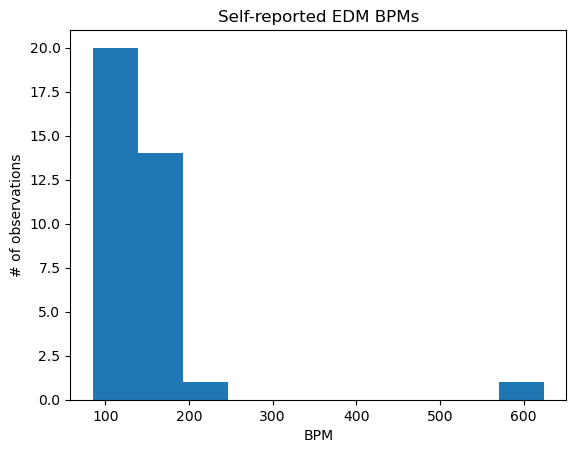

In [76]:
# Visualize survey EDM BPM Data

edm_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'EDM']

plt.hist(edm_survey['BPM'])
plt.xlabel('BPM')
plt.ylabel('# of observations')
plt.title('Self-reported EDM BPMs')

plt.show()

It looks like there's another unrealistic reported BPM. We'll go ahead and drop this row.

In [77]:
outlier = edm_survey.query("BPM > 300")
clean_survey_df = clean_survey_df.drop(outlier.index)

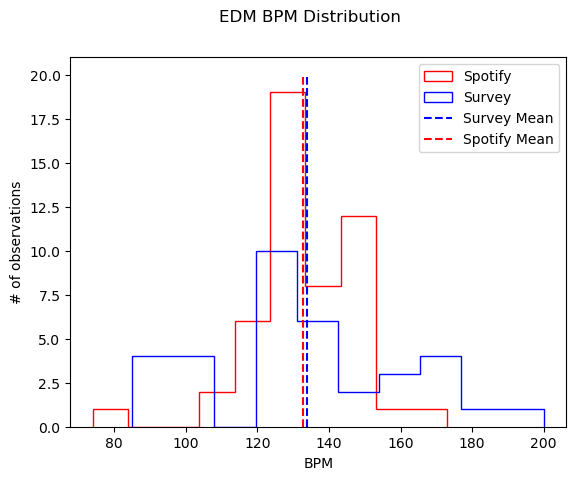

In [78]:
# Visualize survey EDM BPM Data following dropping outlier vs. Spotify data

edm_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'EDM']

fig, ax = plt.subplots()

ax.hist(edm_spotify['tempo'], color='Red', histtype='step')
ax.hist(edm_survey['BPM'], color='Blue', histtype='step')
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('EDM BPM Distribution')

# Add vertical lines denoting the mean of each subset

survey_mean = np.mean(edm_survey['BPM'])
spotify_mean = np.mean(edm_spotify['tempo'])

ax.vlines(x=survey_mean, ymin=0, ymax=20, color='Blue', linestyles='--')
ax.vlines(x=spotify_mean, ymin=0, ymax=20, color='Red', linestyles='--')

plt.legend(['Spotify', 'Survey', 'Survey Mean', 'Spotify Mean'])

plt.show()

In [79]:
edm_spotify['tempo'].describe()

count     50.000000
mean     132.600000
std       15.427249
min       74.000000
25%      125.250000
50%      129.500000
75%      144.000000
max      173.000000
Name: tempo, dtype: float64

We'll use the median of the Spotify data to impute the missing values in the survey data. This will achieve a distribution closer to the Spotify BPM distribution.

In [80]:
# Impute missing values using the median

clean_survey_df.loc[edm_survey.index, 'BPM'] = edm_survey['BPM'].fillna(np.median(edm_spotify['tempo']))
clean_survey_df.loc[edm_survey.index, 'BPM'].isna().sum()

0

## Hip Hop

In [81]:
# Generate dataset

# spotify_machine.gen_genre_df('Hip Hop')

In [82]:
# Load data

hh_spotify = pd.read_csv(datapath + 'Hip Hop.csv')
hh_spotify.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.898   0.472    1    -7.001     1       0.0776       0.01070   
1         0.464   0.745    4    -3.202     0       0.1610       0.02350   
2         0.558   0.559    6    -9.222     1       0.0959       0.37100   
3         0.814   0.676   11    -4.670     0       0.2310       0.00709   
4         0.789   0.858    1    -5.542     1       0.3110       0.12700   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000000     0.141    0.214  101.061  audio_features   
1          0.000000     0.363    0.262  180.098  audio_features   
2          0.000007     0.109    0.620   78.558  audio_features   
3          0.000013     0.119    0.312  162.012  audio_features   
4          0.000000     0.349    0.775  140.022  audio_features   

                       id                                   uri  \
0  6AI3ezQ4o3HUoP6Dhudph3  spotify:track:6AI3ezQ4o3HUoP6Dhudph3   
1  0OA00aPt3BV10qeMIs3meW  spotify:track:0OA00aPt3BV10qeMIs3meW   
2  7KA4W4McWYRpgf0fWsJZWB  spotify:track:7KA4W4McWYRpgf0fWsJZWB   
3  2tudvzsrR56uom6smgOcSf  spotify:track:2tudvzsrR56uom6smgOcSf   
4  1auxYwYrFRqZP7t3s7w4um  spotify:track:1auxYwYrFRqZP7t3s7w4um   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/6AI3ezQ4o3HU...   
1  https://api.spotify.com/v1/tracks/0OA00aPt3BV1...   
2  https://api.spotify.com/v1/tracks/7KA4W4McWYRp...   
3  https://api.spotify.com/v1/tracks/2tudvzsrR56u...   
4  https://api.spotify.com/v1/tracks/1auxYwYrFRqZ...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/6AI3...       274192   
1  https://api.spotify.com/v1/audio-analysis/0OA0...       190667   
2  https://api.spotify.com/v1/audio-analysis/7KA4...       180387   
3  https://api.spotify.com/v1/audio-analysis/2tud...       267707   
4  https://api.spotify.com/v1/audio-analysis/1aux...       219333   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [83]:
# Convert tempi to int

hh_spotify['tempo'] = hh_spotify['tempo'].astype(int)
hh_spotify['tempo'].dtypes

dtype('int64')

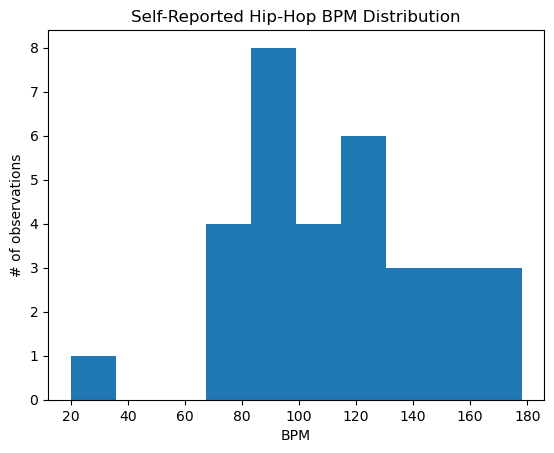

In [84]:
# Visualize distribution of survey hip-hop BPM

hh_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Hip hop']

plt.hist(hh_survey['BPM'])

plt.xlabel('BPM')
plt.ylabel('# of observations')
plt.title('Self-Reported Hip-Hop BPM Distribution')

plt.show()

Another unrealistically low BPM. We'll drop this row.

In [85]:
outlier = hh_survey.query("BPM < 40")
outlier

Age  Hours per day While working Instrumentalist Composer Fav genre  \
372   18            2.0           Yes              No       No   Hip hop   

    Exploratory Foreign languages   BPM Frequency [Classical]  ...  \
372         Yes               Yes  20.0                Rarely  ...   

    Frequency [Pop]  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
372       Sometimes  Very frequently  Very frequently            Never   

    Frequency [Video game music] Anxiety Depression Insomnia OCD Music effects  
372                        Never      10          7        2   0       Improve  

[1 rows x 30 columns]

In [86]:
clean_survey_df = clean_survey_df.drop(outlier.index)

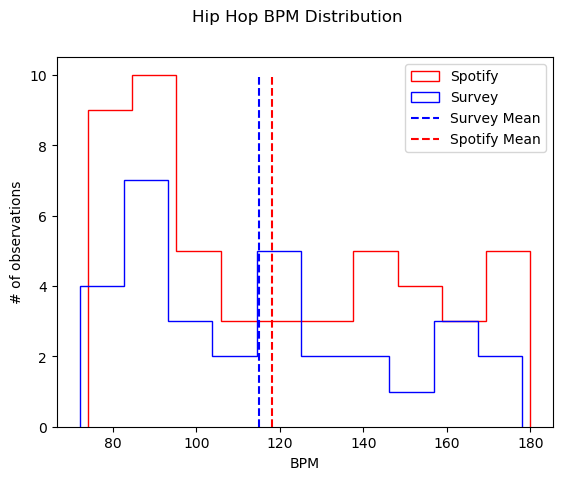

In [87]:
# Visualize distribution of updated survey Hip Hop BPM vs. the spotify dataset

hh_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Hip hop']

fig, ax = plt.subplots()
ax.hist(hh_spotify['tempo'], histtype='step', color='Red')
ax.hist(hh_survey['BPM'], histtype='step', color='Blue')

ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Hip Hop BPM Distribution')

# Add vertical lines denoting means

survey_mean = np.mean(hh_survey['BPM'])
spotify_mean = np.mean(hh_spotify['tempo'])

ax.vlines(x=survey_mean, ymin=0, ymax=10, color='Blue', linestyles='--')
ax.vlines(x=spotify_mean, ymin=0, ymax=10, color='Red', linestyles='--')

plt.legend(['Spotify', 'Survey', 'Survey Mean', 'Spotify Mean'])

plt.show()

We'll use the mode to impute missing values in the survey data, since that will lead the distribution to more closely resemble that of Spotify's data.

In [88]:
# Get 3 largest values for tempo in Spotify data

hh_spotify['tempo'].value_counts().nlargest(3)

tempo
93    3
84    3
95    3
Name: count, dtype: int64

We'll go ahead and use 93 to impute missing values

In [89]:
clean_survey_df.loc[hh_survey.index, 'BPM'] = hh_survey['BPM'].fillna(93)
clean_survey_df.loc[hh_survey.index, 'BPM'].isna().sum()

0

### Pop

In [90]:
# Generate Pop Spotify data

# spotify_machine.gen_genre_df('Pop')

In [91]:
# Load Pop data

pop_spotify = pd.read_csv(datapath + 'Pop.csv')
pop_spotify.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.521   0.592    6    -7.777     0       0.0304        0.3080   
1         0.747   0.507    2   -10.171     1       0.0358        0.2000   
2         0.701   0.760    0    -5.478     1       0.0285        0.1070   
3         0.617   0.635   11    -6.769     0       0.0317        0.0498   
4         0.793   0.793   11    -4.521     0       0.0830        0.0123   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000000    0.1220    0.535  157.969  audio_features   
1          0.060800    0.1170    0.438  104.978  audio_features   
2          0.000065    0.1850    0.690  103.969  audio_features   
3          0.000014    0.1640    0.446  103.019  audio_features   
4          0.000000    0.0951    0.679  123.950  audio_features   

                       id                                   uri  \
0  2plbrEY59IikOBgBGLjaoe  spotify:track:2plbrEY59IikOBgBGLjaoe   
1  6dOtVTDdiauQNBQEDOtlAB  spotify:track:6dOtVTDdiauQNBQEDOtlAB   
2  2qSkIjg1o9h3YT9RAgYN75  spotify:track:2qSkIjg1o9h3YT9RAgYN75   
3  6RUKPb4LETWmmr3iAEQktW  spotify:track:6RUKPb4LETWmmr3iAEQktW   
4  3PfIrDoz19wz7qK7tYeu62  spotify:track:3PfIrDoz19wz7qK7tYeu62   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2plbrEY59Iik...   
1  https://api.spotify.com/v1/tracks/6dOtVTDdiauQ...   
2  https://api.spotify.com/v1/tracks/2qSkIjg1o9h3...   
3  https://api.spotify.com/v1/tracks/6RUKPb4LETWm...   
4  https://api.spotify.com/v1/tracks/3PfIrDoz19wz...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2plb...       251668   
1  https://api.spotify.com/v1/audio-analysis/6dOt...       210373   
2  https://api.spotify.com/v1/audio-analysis/2qSk...       175459   
3  https://api.spotify.com/v1/audio-analysis/6RUK...       247160   
4  https://api.spotify.com/v1/audio-analysis/3PfI...       183290   

   time_signature  
0               3  
1               4  
2               4  
3               4  
4               4

In [92]:
# Convert tempo to int

pop_spotify['tempo'] = pop_spotify['tempo'].astype(int)
pop_spotify['tempo'].dtypes

dtype('int64')

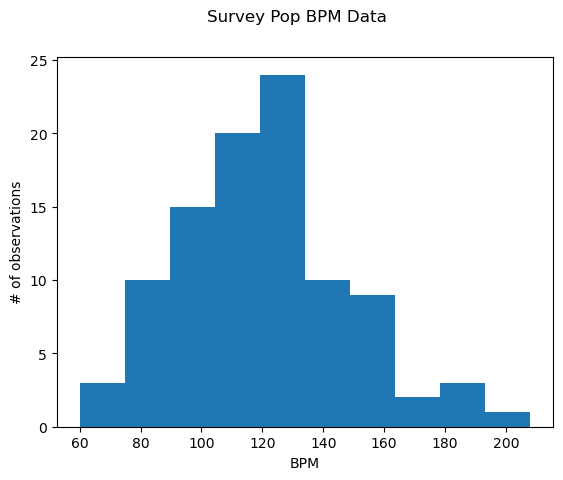

In [93]:
# Visualize survey Pop data

pop_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Pop']

fig, ax = plt.subplots()

ax.hist(pop_survey['BPM'])
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Survey Pop BPM Data')

plt.show()

Let's compare this to the Spotify data

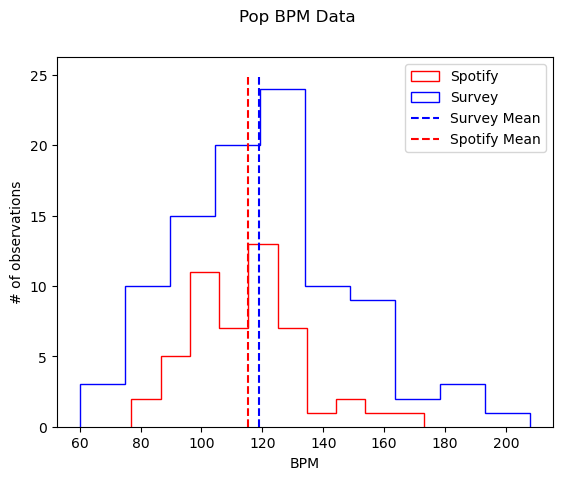

In [94]:
# Visualize survey Pop data vs. Spotify Pop data

pop_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Pop']

fig, ax = plt.subplots()

ax.hist(pop_spotify['tempo'], color='Red', histtype='step')
ax.hist(pop_survey['BPM'], color='Blue', histtype='step')
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Pop BPM Data')

# Vertical lines for means

survey_mean = np.mean(pop_survey['BPM'])
spotify_mean = np.mean(pop_spotify['tempo'])

ax.vlines(x=survey_mean, ymin=0, ymax=25, linestyle='--', color='Blue')
ax.vlines(x=spotify_mean, ymin=0, ymax=25, linestyle='--', color='Red')

plt.legend(['Spotify', 'Survey', 'Survey Mean', 'Spotify Mean'])

plt.show()

Since the distributions are so alike, we will use the Survey mean to impute the missing values. This is because we have more observations in the Survey data than we collected from Spotify.

In [95]:
clean_survey_df.loc[pop_survey.index, 'BPM'] = pop_survey['BPM'].fillna(survey_mean)
clean_survey_df.loc[pop_survey.index, 'BPM'].isna().sum()

0

### Classical

In [96]:
# Generate dataset

# spotify_machine.gen_genre_df('Classical')

In [97]:
# Load data

classical_spotify = pd.read_csv(datapath + 'Classical.csv')
classical_spotify.head()

danceability   energy  key  loudness  mode  speechiness  acousticness  \
0        0.2130  0.06560    7   -24.810     1       0.0467         0.992   
1        0.3300  0.00357    3   -33.142     1       0.0339         0.995   
2        0.4130  0.00969    5   -29.674     0       0.0555         0.995   
3        0.0928  0.11800    2   -22.083     1       0.0440         0.393   
4        0.3680  0.00363    1   -36.759     1       0.0350         0.993   

   instrumentalness  liveness  valence    tempo            type  \
0             0.969    0.0699   0.0384   65.023  audio_features   
1             0.953    0.0989   0.1210  100.741  audio_features   
2             0.948    0.0965   0.0765   90.975  audio_features   
3             0.882    0.1110   0.0377   86.786  audio_features   
4             0.922    0.1370   0.0850   69.363  audio_features   

                       id                                   uri  \
0  3U8Fx7zNTQrctytkj6Gqgd  spotify:track:3U8Fx7zNTQrctytkj6Gqgd   
1  6MzbO6YS0M6tjwT93hjAl0  spotify:track:6MzbO6YS0M6tjwT93hjAl0   
2  4TSGOrfNBKP95TqUHHjOSh  spotify:track:4TSGOrfNBKP95TqUHHjOSh   
3  3zhI27rwuBWsh1LX4a1UF9  spotify:track:3zhI27rwuBWsh1LX4a1UF9   
4  1L4NadMj3Jj7YgGaikyhfr  spotify:track:1L4NadMj3Jj7YgGaikyhfr   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/3U8Fx7zNTQrc...   
1  https://api.spotify.com/v1/tracks/6MzbO6YS0M6t...   
2  https://api.spotify.com/v1/tracks/4TSGOrfNBKP9...   
3  https://api.spotify.com/v1/tracks/3zhI27rwuBWs...   
4  https://api.spotify.com/v1/tracks/1L4NadMj3Jj7...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/3U8F...       150147   
1  https://api.spotify.com/v1/audio-analysis/6Mzb...       216213   
2  https://api.spotify.com/v1/audio-analysis/4TSG...       227138   
3  https://api.spotify.com/v1/audio-analysis/3zhI...       251643   
4  https://api.spotify.com/v1/audio-analysis/1L4N...       254000   

   time_signature  
0               3  
1               3  
2               4  
3               4  
4               3

In [98]:
# Convert tempo to int

classical_spotify['tempo'] = classical_spotify['tempo'].astype(int)
classical_spotify['tempo'].dtypes

dtype('int64')

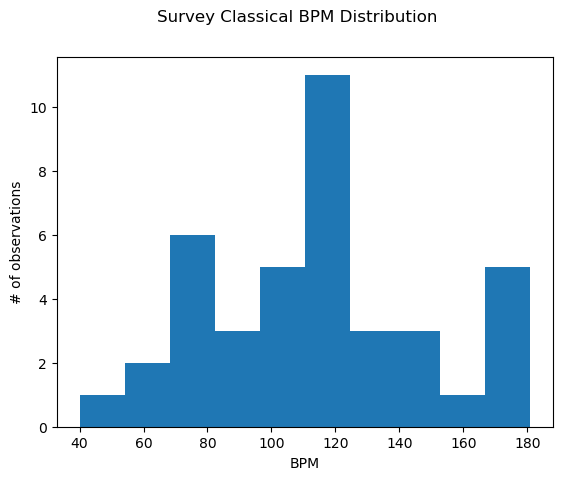

In [99]:
# Visualize survey data

classical_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Classical']

fig, ax = plt.subplots()

ax.hist(classical_survey['BPM'])
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Survey Classical BPM Distribution')

plt.show()

Since this looks pretty normal, let's compare to the Spotify dataset.

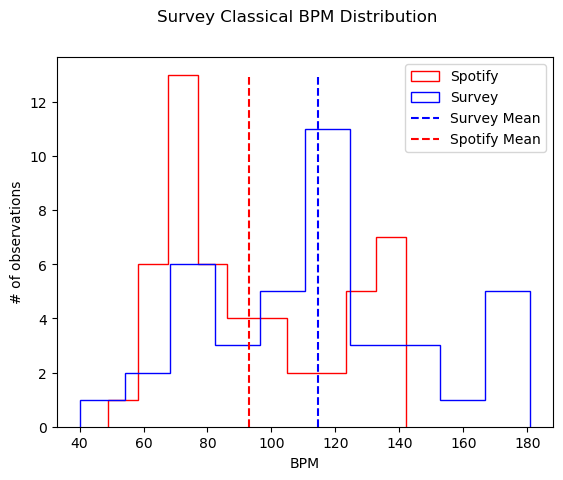

In [100]:
# Visualize survey data

fig, ax = plt.subplots()

ax.hist(classical_spotify['tempo'], histtype='step', color='Red')
ax.hist(classical_survey['BPM'], histtype='step', color='Blue')
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Survey Classical BPM Distribution')

# Mean Vertical Lines

survey_mean = np.mean(classical_survey['BPM'])
spotify_mean = np.mean(classical_spotify['tempo'])

ax.vlines(x=survey_mean, color='Blue', ymin=0, ymax=13, linestyles='--')
ax.vlines(x=spotify_mean, color='Red', ymin=0, ymax=13, linestyles='--')

plt.legend(['Spotify', 'Survey', 'Survey Mean', 'Spotify Mean'])

plt.show()

We'll use the Spotify mode to impute values.

In [101]:
classical_spotify['tempo'].value_counts().nlargest(3)

tempo
69    3
70    3
90    2
Name: count, dtype: int64

In [102]:
# Impute missing values with 69
 
clean_survey_df.loc[classical_survey.index, 'BPM'] = classical_survey['BPM'].fillna(69)
clean_survey_df.loc[classical_survey.index, 'BPM'].isna().sum()

0

### Metal

In [103]:
# Generate data

# spotify_machine.gen_genre_df('Metal')

In [104]:
# Load data

metal_spotify = pd.read_csv(datapath + 'Metal.csv')
metal_spotify.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.354   0.982    4    -3.026     0       0.1680      0.000237   
1         0.590   0.963    0    -6.489     0       0.0676      0.000087   
2         0.430   0.704    1    -8.008     0       0.0804      0.000155   
3         0.435   0.987    1    -4.667     0       0.1600      0.000195   
4         0.325   0.985   11    -3.941     1       0.1510      0.001770   

   instrumentalness  liveness  valence    tempo            type  \
0          0.000294    0.2040    0.194  143.772  audio_features   
1          0.000105    0.0781    0.586  125.033  audio_features   
2          0.002210    0.0933    0.703  118.242  audio_features   
3          0.087900    0.2680    0.100  103.162  audio_features   
4          0.107000    0.3510    0.221  125.307  audio_features   

                       id                                   uri  \
0  61mWefnWQOLf90gepjOCb3  spotify:track:61mWefnWQOLf90gepjOCb3   
1  6Nm8h73ycDG2saCnZV8poF  spotify:track:6Nm8h73ycDG2saCnZV8poF   
2  7fcfNW0XxTWlwVlftzfDOR  spotify:track:7fcfNW0XxTWlwVlftzfDOR   
3  0L7zm6afBEtrNKo6C6Gj08  spotify:track:0L7zm6afBEtrNKo6C6Gj08   
4  5LyRtsQLhcXmy50VXhQXXS  spotify:track:5LyRtsQLhcXmy50VXhQXXS   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/61mWefnWQOLf...   
1  https://api.spotify.com/v1/tracks/6Nm8h73ycDG2...   
2  https://api.spotify.com/v1/tracks/7fcfNW0XxTWl...   
3  https://api.spotify.com/v1/tracks/0L7zm6afBEtr...   
4  https://api.spotify.com/v1/tracks/5LyRtsQLhcXm...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/61mW...       252613   
1  https://api.spotify.com/v1/audio-analysis/6Nm8...       222827   
2  https://api.spotify.com/v1/audio-analysis/7fcf...       315120   
3  https://api.spotify.com/v1/audio-analysis/0L7z...       365827   
4  https://api.spotify.com/v1/audio-analysis/5LyR...       392600   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [105]:
# Convert tempo to int

metal_spotify['tempo'] = metal_spotify['tempo'].astype(int)
metal_spotify['tempo'].dtypes

dtype('int64')

In [106]:
# Check for missing values in survey metal data

metal_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Metal']
metal_survey['BPM'].isna().sum()

10

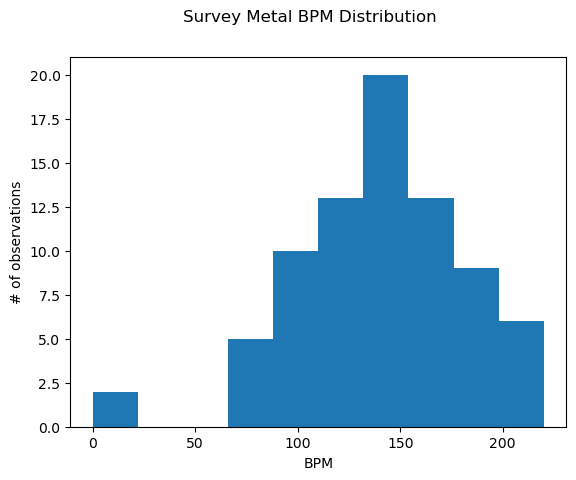

In [107]:
# Visualize survey metal data

fig, ax = plt.subplots()

ax.hist(metal_survey['BPM'])
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Survey Metal BPM Distribution')

plt.show()

The rows containing unrealistically low BPMs will be dropped.

In [108]:
outliers = metal_survey.query("BPM < 50")
outliers

Age  Hours per day While working Instrumentalist Composer Fav genre  \
524   28            3.0            No             Yes      Yes     Metal   
639   30            0.0            No              No       No     Metal   

    Exploratory Foreign languages  BPM Frequency [Classical]  ...  \
524         Yes               Yes  0.0       Very frequently  ...   
639          No                No  0.0                Rarely  ...   

    Frequency [Pop] Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
524          Rarely       Sometimes           Never  Very frequently   
639           Never           Never          Rarely           Rarely   

    Frequency [Video game music] Anxiety Depression Insomnia OCD Music effects  
524              Very frequently       8          8        5   2       Improve  
639                       Rarely      10         10       10   9       Improve  

[2 rows x 30 columns]

In [109]:
clean_survey_df = clean_survey_df.drop(outliers.index)
metal_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Metal']

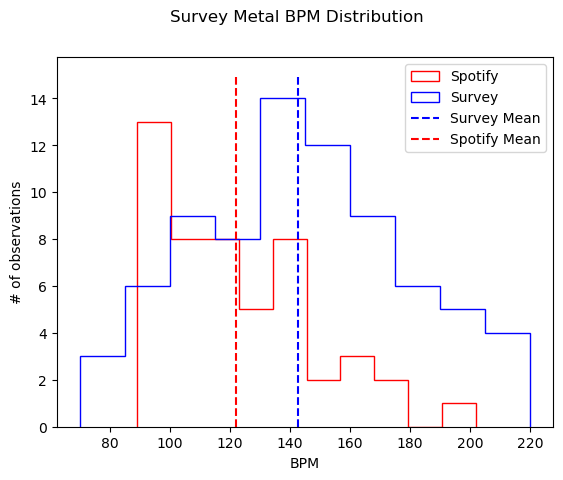

In [110]:
# Visualize updated survey metal data vs. spotify data

fig, ax = plt.subplots()

ax.hist(metal_spotify['tempo'], color='Red', histtype='step')
ax.hist(metal_survey['BPM'], color='Blue', histtype='step')
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Survey Metal BPM Distribution')

# Mean lines

survey_mean = np.mean(metal_survey['BPM'])
spotify_mean = np.mean(metal_spotify['tempo'])

ax.vlines(x=survey_mean, ymin=0, ymax=15, linestyles='--', color='Blue')
ax.vlines(x=spotify_mean, ymin=0, ymax=15, linestyles='--', color='Red')

plt.legend(['Spotify', 'Survey', 'Survey Mean', 'Spotify Mean'])

plt.show()

The Spotify mean will be used to impute missing values.

In [111]:
clean_survey_df.loc[metal_survey.index, 'BPM'] = metal_survey['BPM'].fillna(spotify_mean)
clean_survey_df.loc[metal_survey.index, 'BPM'].isna().sum()

0

### Folk

In [112]:
# Generate data

#spotify_machine.gen_genre_df('Folk')

In [113]:
# Load data

folk_spotify = pd.read_csv(datapath + 'Folk.csv')
folk_spotify.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.513   0.396    7   -13.061     1       0.0299         0.251   
1         0.600   0.186    3   -15.926     1       0.0317         0.909   
2         0.606   0.457    6   -14.035     0       0.0497         0.713   
3         0.642   0.427    3    -8.471     1       0.0402         0.871   
4         0.462   0.395    9    -9.376     1       0.0264         0.758   

   instrumentalness  liveness  valence    tempo            type  \
0          0.177000    0.1100    0.229  140.208  audio_features   
1          0.001020    0.1040    0.468  110.044  audio_features   
2          0.000025    0.0747    0.813   92.033  audio_features   
3          0.090400    0.1240    0.404   82.344  audio_features   
4          0.000000    0.1210    0.625   82.259  audio_features   

                       id                                   uri  \
0  6HSXNV0b4M4cLJ7ljgVVeh  spotify:track:6HSXNV0b4M4cLJ7ljgVVeh   
1  3Kj2EWpIBnvETsYq4cq0IH  spotify:track:3Kj2EWpIBnvETsYq4cq0IH   
2  0iOZM63lendWRTTeKhZBSC  spotify:track:0iOZM63lendWRTTeKhZBSC   
3  4KROoGIaPaR1pBHPnR3bwC  spotify:track:4KROoGIaPaR1pBHPnR3bwC   
4  1YYhDizHx7PnDhAhko6cDS  spotify:track:1YYhDizHx7PnDhAhko6cDS   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/6HSXNV0b4M4c...   
1  https://api.spotify.com/v1/tracks/3Kj2EWpIBnvE...   
2  https://api.spotify.com/v1/tracks/0iOZM63lendW...   
3  https://api.spotify.com/v1/tracks/4KROoGIaPaR1...   
4  https://api.spotify.com/v1/tracks/1YYhDizHx7Pn...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/6HSX...       149880   
1  https://api.spotify.com/v1/audio-analysis/3Kj2...       217467   
2  https://api.spotify.com/v1/audio-analysis/0iOZ...       244027   
3  https://api.spotify.com/v1/audio-analysis/4KRO...       124001   
4  https://api.spotify.com/v1/audio-analysis/1YYh...       190160   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [114]:
# Convert tempo to int

folk_spotify['tempo'] = folk_spotify['tempo'].astype(int)
folk_spotify['tempo'].dtypes

dtype('int64')

In [115]:
# Check for missing values in survey BPM data

folk_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Folk']
folk_survey['BPM'].isna().sum()

4

In [116]:
#

We'll drop the unrealistically low outlier.

In [117]:
outlier = folk_survey.query("BPM < 25")
outlier

Age  Hours per day While working Instrumentalist Composer Fav genre  \
339   35            3.0            No             Yes       No      Folk   

    Exploratory Foreign languages  BPM Frequency [Classical]  ...  \
339         Yes                No  0.0             Sometimes  ...   

    Frequency [Pop] Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
339          Rarely           Never           Never        Sometimes   

    Frequency [Video game music] Anxiety Depression Insomnia OCD Music effects  
339                    Sometimes       8          2        2   8     No effect  

[1 rows x 30 columns]

In [118]:
# Drop outlier

clean_survey_df = clean_survey_df.drop(outlier.index)
folk_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Folk']

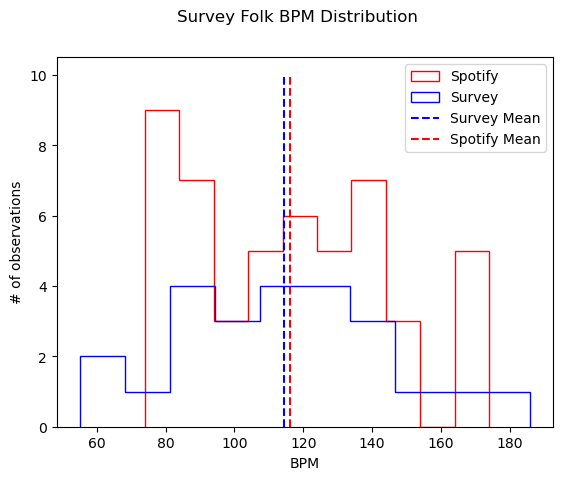

In [119]:
# Visualize updated survey BPM data vs. Spotify data

fig, ax = plt.subplots()

ax.hist(folk_spotify['tempo'], color='Red', histtype='step')
ax.hist(folk_survey['BPM'], color='Blue', histtype='step')
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Survey Folk BPM Distribution')

# Mean vertical lines

survey_mean = np.mean(folk_survey['BPM'])
spotify_mean = np.mean(folk_spotify['tempo'])

ax.vlines(x=survey_mean, ymin=0, ymax=10, linestyles='--', color='Blue')
ax.vlines(x=spotify_mean, ymin=0, ymax=10, linestyles='--', color='Red')

plt.legend(['Spotify', 'Survey', 'Survey Mean', 'Spotify Mean'])

plt.show()

The survey mean will be used to impute missing values.

In [120]:
# Impute missing values and verify there are none left

clean_survey_df.loc[folk_survey.index, 'BPM'] = folk_survey['BPM'].fillna(survey_mean)
clean_survey_df.loc[folk_survey.index, 'BPM'].isna().sum()

0

### Lofi

In [121]:
# Generate data

# spotify_machine.gen_genre_df('Lofi')

In [122]:
# Load data

lofi_spotify = pd.read_csv(datapath + 'Lofi.csv')
lofi_spotify.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.604   0.210   10   -21.578     0       0.0524         0.935   
1         0.546   0.240    7   -18.570     1       0.0326         0.954   
2         0.647   0.250    0   -14.159     1       0.0479         0.858   
3         0.749   0.462    4    -9.609     0       0.0824         0.924   
4         0.565   0.126    5   -20.379     0       0.0997         0.450   

   instrumentalness  liveness  valence    tempo            type  \
0             0.953     0.105    0.677   97.003  audio_features   
1             0.880     0.170    0.157  135.997  audio_features   
2             0.943     0.224    0.478   75.075  audio_features   
3             0.844     0.359    0.131  139.972  audio_features   
4             0.613     0.130    0.154   67.238  audio_features   

                       id                                   uri  \
0  7HmN3o3K10kMkBqAvKJYQA  spotify:track:7HmN3o3K10kMkBqAvKJYQA   
1  30rTyiyQ3ccLI7o9adrTxh  spotify:track:30rTyiyQ3ccLI7o9adrTxh   
2  4QTvCvwmZGf7k5hlCzJADJ  spotify:track:4QTvCvwmZGf7k5hlCzJADJ   
3  7kHP99xLiwtQurrg1OQhE1  spotify:track:7kHP99xLiwtQurrg1OQhE1   
4  3oFO27T3vDDDMzaxeFYfXE  spotify:track:3oFO27T3vDDDMzaxeFYfXE   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/7HmN3o3K10kM...   
1  https://api.spotify.com/v1/tracks/30rTyiyQ3ccL...   
2  https://api.spotify.com/v1/tracks/4QTvCvwmZGf7...   
3  https://api.spotify.com/v1/tracks/7kHP99xLiwtQ...   
4  https://api.spotify.com/v1/tracks/3oFO27T3vDDD...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/7HmN...       139097   
1  https://api.spotify.com/v1/audio-analysis/30rT...       154412   
2  https://api.spotify.com/v1/audio-analysis/4QTv...       196800   
3  https://api.spotify.com/v1/audio-analysis/7kHP...       140571   
4  https://api.spotify.com/v1/audio-analysis/3oFO...       200597   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

In [123]:
# Convert tempo to int

lofi_spotify['tempo'] = lofi_spotify['tempo'].astype(int)
lofi_spotify['tempo'].dtypes

dtype('int64')

In [124]:
# Check for missing values in survey data

lofi_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Lofi']
lofi_survey['BPM'].isna().sum()

0

There are no missing values, but we will still check the data for outleirs.

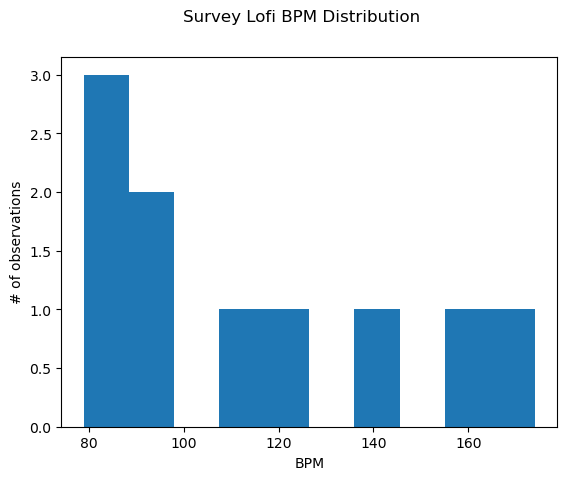

In [125]:
# Visualize survey lofi data

fig, ax = plt.subplots()
ax.hist(lofi_survey['BPM'])
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Survey Lofi BPM Distribution')

plt.show()

Looks good!

### Gospel

In [126]:
# First we'll check for missing data in survey

gospel_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Gospel']
gospel_survey['BPM'].isna().sum()

2

In [127]:
# Generate Spotify data

# spotify_machine.gen_genre_df('Gospel')

In [128]:
# Load data

gospel_spotify = pd.read_csv(datapath + 'Gospel.csv')
gospel_spotify.head()

danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.338   0.559   0.0    -7.053   1.0       0.1180         0.252   
1         0.407   0.613  10.0    -8.616   1.0       0.1950         0.344   
2         0.530   0.541   5.0    -9.475   1.0       0.2730         0.318   
3         0.241   0.445   8.0   -10.443   1.0       0.0386         0.694   
4         0.321   0.481   8.0   -11.060   1.0       0.0844         0.040   

   instrumentalness  liveness  valence    tempo            type  \
0               0.0    0.3800    0.276  168.489  audio_features   
1               0.0    0.4580    0.228  102.519  audio_features   
2               0.0    0.5280    0.532  100.616  audio_features   
3               0.0    0.0842    0.205   78.448  audio_features   
4               0.0    0.1020    0.157  105.325  audio_features   

                       id                                   uri  \
0  3QdBvvYJ9k1CES1e9aYvaA  spotify:track:3QdBvvYJ9k1CES1e9aYvaA   
1  1B5NWdLAt8GC4WKTPUCrLM  spotify:track:1B5NWdLAt8GC4WKTPUCrLM   
2  0bGyh9iwb37ElctPNsxdwX  spotify:track:0bGyh9iwb37ElctPNsxdwX   
3  4OK1XrubP6GJs4f6czk8Jg  spotify:track:4OK1XrubP6GJs4f6czk8Jg   
4  3prZxvQe9PF1PKBZJM3L3u  spotify:track:3prZxvQe9PF1PKBZJM3L3u   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/3QdBvvYJ9k1C...   
1  https://api.spotify.com/v1/tracks/1B5NWdLAt8GC...   
2  https://api.spotify.com/v1/tracks/0bGyh9iwb37E...   
3  https://api.spotify.com/v1/tracks/4OK1XrubP6GJ...   
4  https://api.spotify.com/v1/tracks/3prZxvQe9PF1...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/3QdB...     415133.0   
1  https://api.spotify.com/v1/audio-analysis/1B5N...     514307.0   
2  https://api.spotify.com/v1/audio-analysis/0bGy...     368440.0   
3  https://api.spotify.com/v1/audio-analysis/4OK1...     306533.0   
4  https://api.spotify.com/v1/audio-analysis/3prZ...     552760.0   

   time_signature error  
0             4.0   NaN  
1             4.0   NaN  
2             4.0   NaN  
3             4.0   NaN  
4             4.0   NaN

In [129]:
gospel_spotify['tempo'].isna().sum()

1

Ironically this data has a missing value. We'll just use the mean to impute it.

In [130]:
spotify_mean = np.mean(gospel_spotify['tempo'])
gospel_spotify['tempo'] = gospel_spotify['tempo'].fillna(spotify_mean)
gospel_spotify['tempo'].isna().sum()

0

In [131]:
# Convert tempo to int

gospel_spotify['tempo'] = gospel_spotify['tempo'].astype(int)
gospel_spotify['tempo'].dtypes

dtype('int64')

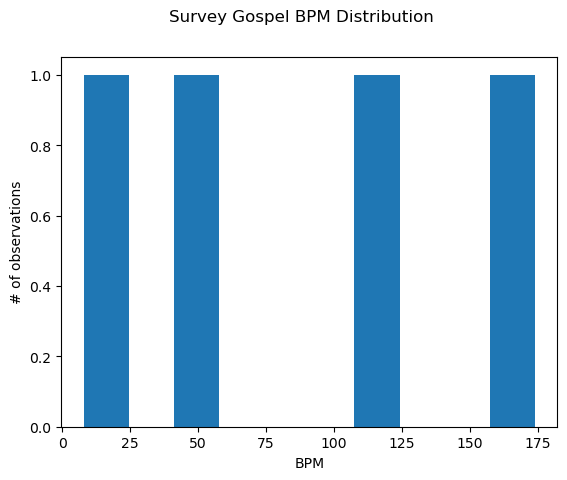

In [132]:
# Visualize survey Gospel data

fig, ax = plt.subplots()

ax.hist(gospel_survey['BPM'])
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Survey Gospel BPM Distribution')

plt.show()

The BPM lower than 25 is unrealistic and will be dropped. The rest look ok.

In [133]:
outlier = gospel_survey.query("BPM < 25")
outlier

Age  Hours per day While working Instrumentalist Composer Fav genre  \
567   68            1.0           Yes              No       No    Gospel   

    Exploratory Foreign languages  BPM Frequency [Classical]  ...  \
567          No                No  8.0       Very frequently  ...   

    Frequency [Pop] Frequency [R&B] Frequency [Rap] Frequency [Rock]  \
567           Never           Never           Never            Never   

    Frequency [Video game music] Anxiety Depression Insomnia OCD Music effects  
567                        Never      10         10       10   0       Improve  

[1 rows x 30 columns]

In [134]:
clean_survey_df = clean_survey_df.drop(outlier.index)
gospel_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Gospel']

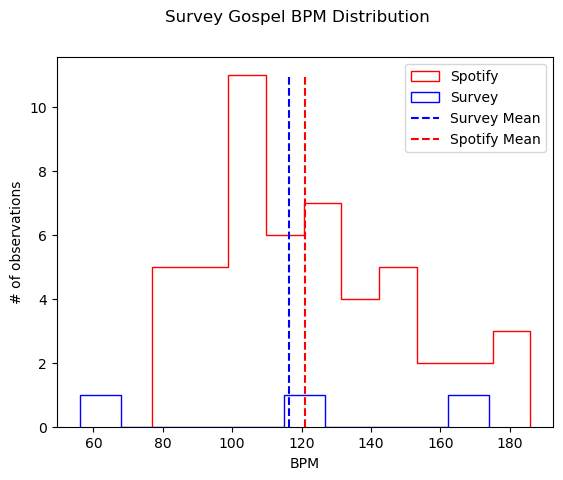

In [135]:
# Visualize updated survey Gospel data vs. Spotify data

fig, ax = plt.subplots()

ax.hist(gospel_spotify['tempo'], color='Red', histtype='step')
ax.hist(gospel_survey['BPM'], color='Blue', histtype='step')
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Survey Gospel BPM Distribution')

# Vertical mean lines

survey_mean = np.mean(gospel_survey['BPM'])

ax.vlines(x=survey_mean, ymin=0, ymax=11, linestyles='--', color='Blue')
ax.vlines(x=spotify_mean, ymin=0, ymax=11, linestyles='--', color='Red')

plt.legend(['Spotify', 'Survey', 'Survey Mean', 'Spotify Mean'])

plt.show()

The Spotify mode will be used to impute the missing value.

In [136]:
gospel_spotify['tempo'].value_counts().nlargest(3)

tempo
121    3
115    2
112    2
Name: count, dtype: int64

In [137]:
# Impute missing value with 121

clean_survey_df.loc[gospel_survey.index, 'BPM'] = gospel_survey['BPM'].fillna(121)
clean_survey_df.loc[gospel_survey.index, 'BPM'].isna().sum()

0

### Latin

In [138]:
# Investigate missing values in survey data

latin_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Latin']
latin_survey['BPM'].isna().sum()

0

Although there are no missing values, we'll still double check the distribution for any errors.

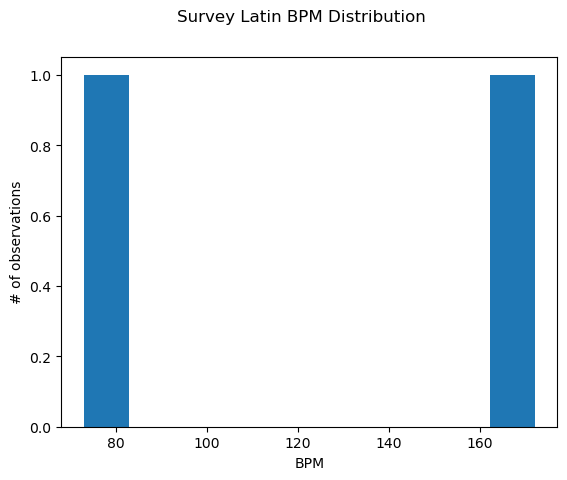

In [139]:
# Visualize survey Latin BPM data

fig, ax = plt.subplots()

ax.hist(latin_survey['BPM'])
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Survey Latin BPM Distribution')

plt.show()

Looks good, no reason to change anything.

### Rap

In [140]:
# Check survey rap data for missing values

rap_survey = clean_survey_df[clean_survey_df['Fav genre'] == 'Rap']
rap_survey['BPM'].isna().sum()

2

In [141]:
# Generate Spotify Rap data

# spotify_machine.gen_genre_df('Rap')

In [142]:
# Load data

rap_spotify = pd.read_csv(datapath + 'Rap.csv')
rap_spotify.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.916   0.578   11    -6.275     1       0.1240       0.00349   
1         0.760   0.663    9    -4.763     0       0.0551       0.10900   
2         0.853   0.690   10    -5.858     1       0.0647       0.07710   
3         0.757   0.628    4    -6.715     0       0.1010       0.18900   
4         0.731   0.685   11    -4.707     0       0.1200       0.05400   

   instrumentalness  liveness  valence    tempo            type  \
0           0.00402    0.1130    0.192  124.005  audio_features   
1           0.00000    0.3050    0.209  143.082  audio_features   
2           0.00000    0.0835    0.471  125.951  audio_features   
3           0.02090    0.2210    0.321  119.980  audio_features   
4           0.00000    0.0865    0.458  121.991  audio_features   

                       id                                   uri  \
0  2jnezASa7o0lP6aif6VrIf  spotify:track:2jnezASa7o0lP6aif6VrIf   
1  2cZOYofOX4d6g0OXxkaIjA  spotify:track:2cZOYofOX4d6g0OXxkaIjA   
2  1560osUcXrnov6yuOjXvc1  spotify:track:1560osUcXrnov6yuOjXvc1   
3  2c7z5oRcPBbqRaBY2mLWcf  spotify:track:2c7z5oRcPBbqRaBY2mLWcf   
4  3lCb7ZYE3Fvie4JOPqpXfY  spotify:track:3lCb7ZYE3Fvie4JOPqpXfY   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2jnezASa7o0l...   
1  https://api.spotify.com/v1/tracks/2cZOYofOX4d6...   
2  https://api.spotify.com/v1/tracks/1560osUcXrno...   
3  https://api.spotify.com/v1/tracks/2c7z5oRcPBbq...   
4  https://api.spotify.com/v1/tracks/3lCb7ZYE3Fvi...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2jne...       159894   
1  https://api.spotify.com/v1/audio-analysis/2cZO...       148053   
2  https://api.spotify.com/v1/audio-analysis/1560...       137143   
3  https://api.spotify.com/v1/audio-analysis/2c7z...       217333   
4  https://api.spotify.com/v1/audio-analysis/3lCb...       167229   

   time_signature  
0               4  
1               4  
2               4  
3               4  
4               4

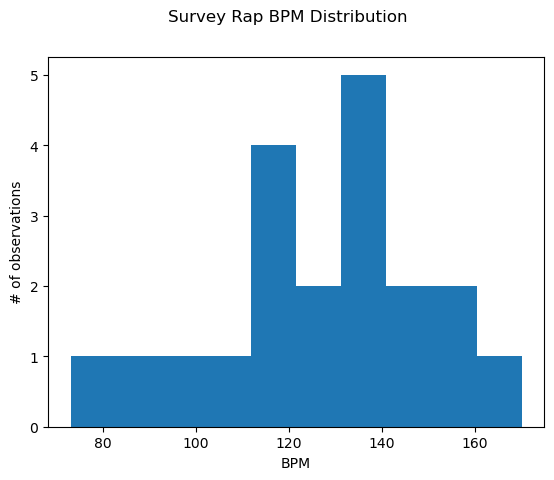

In [143]:
# Visualize survey Rap data

fig, ax = plt.subplots()

ax.hist(rap_survey['BPM'])
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Survey Rap BPM Distribution')

plt.show()

Everything looks good, we'll go ahead and compare this with the Spotify data.

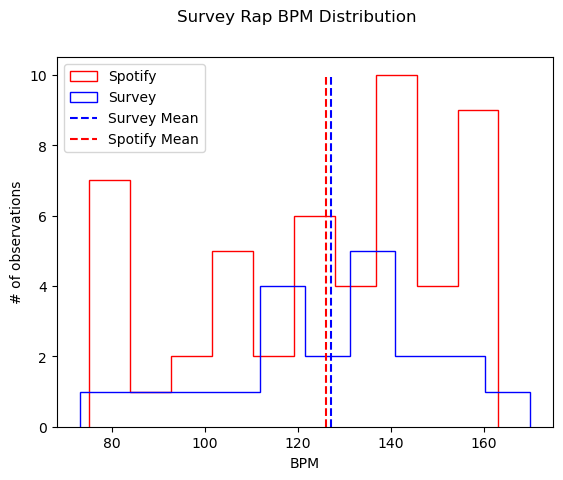

In [144]:
# Visualize survey Rap data vs. Spotify data 

fig, ax = plt.subplots()

ax.hist(rap_spotify['tempo'], histtype='step', color='Red')
ax.hist(rap_survey['BPM'], histtype='step', color='Blue')
ax.set_xlabel('BPM')
ax.set_ylabel('# of observations')
fig.suptitle('Survey Rap BPM Distribution')

# Add mean lines

survey_mean = np.mean(rap_survey['BPM'])
spotify_mean = np.mean(rap_spotify['tempo'])

ax.vlines(x=survey_mean, color='Blue', linestyles='--', ymin=0, ymax=10)
ax.vlines(x=spotify_mean, color='Red', linestyles='--', ymin=0, ymax=10)

plt.legend(['Spotify', 'Survey', 'Survey Mean', 'Spotify Mean'])

plt.show()

In this case we'll go ahead and ipute using the Spotify mean.

In [145]:
clean_survey_df.loc[rap_survey.index, 'BPM'] = rap_survey['BPM'].fillna(spotify_mean)
clean_survey_df.loc[rap_survey.index, 'BPM'].isna().sum()

0

# Verifying Missing Values

In [146]:
# Check for missing values in the dataset

clean_survey_df.isna().sum()

Age                             0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia                        0
OCD                             0
Music effects 

In [148]:
# Verify datatypes

clean_survey_df.dtypes

Age                               int64
Hours per day                   float64
While working                    object
Instrumentalist                  object
Composer                         object
Fav genre                        object
Exploratory                      object
Foreign languages                object
BPM                             float64
Frequency [Classical]            object
Frequency [Country]              object
Frequency [EDM]                  object
Frequency [Folk]                 object
Frequency [Gospel]               object
Frequency [Hip hop]              object
Frequency [Jazz]                 object
Frequency [K pop]                object
Frequency [Latin]                object
Frequency [Lofi]                 object
Frequency [Metal]                object
Frequency [Pop]                  object
Frequency [R&B]                  object
Frequency [Rap]                  object
Frequency [Rock]                 object
Frequency [Video game music]     object


# Save Cleaned Data to .csv

In [147]:
clean_survey_df.to_csv('../data/interim/clean_survey_results.csv', index=False)